In [2]:
import pandas as pd
import numpy as np
import os
from glob import glob
import cv2
import matplotlib.pyplot as plt
import random
import torch

import pydicom

In [3]:
os.getcwd()

'/mnt/nvme_disk2/User_data/nc36192d/rushi/Learnings/RSNA-MCCAI'

## **Exploring data**

In [4]:
train_dir = "/mnt/nvme_disk2/User_data/nc36192d/rushi/Learnings/kaggle_datasets/rsna_dataset/train"
test_dir = "/mnt/nvme_disk2/User_data/nc36192d/rushi/Learnings/kaggle_datasets/rsna_dataset/test"
child_dir = ["FLAIR" , "T1w", "T1wCE", "T2w"]

In [5]:
train_data = os.listdir(train_dir)
print("length of train data:\t",len(train_data))
test_data = os.listdir(test_dir)
print("length of test data:\t",len(test_data))

length of train data:	 585
length of test data:	 87


In [6]:
train_data[0]

'00000'

In [7]:
random.choice(train_data)

'00116'

In [8]:
choice = random.choice(train_data)
print(f"looking into: {choice}")
for i in child_dir:
    print('*'*50)
    string = f"{train_dir}/{choice}/{i}/*.dcm"
    #print(string)
    dcms = glob(string)
    dcm_random = random.choice(dcms)
    print(f"Number of datapoints in {i} is:\n{len(dcms)}")
    img = pydicom.dcmread(dcm_random)
    print('printing shape of the image:\t',img.pixel_array.shape)
    print('printing postion of the image:\t',img.ImagePositionPatient)
    print('printing slice thickness of the image:\t',img.SliceThickness)
    print("Slope of the Images:\t",img.RescaleSlope)
    print("Slope of the Images:\t",img.RescaleSlope)
    print("Pixel spacing of Images:\t",img.PixelSpacing)
    #break

looking into: 00339
**************************************************
Number of datapoints in FLAIR is:
60
printing shape of the image:	 (256, 192)
printing postion of the image:	 [-91.796884668065, -173.61725092718, -98.573715209961]
printing slice thickness of the image:	 3
Slope of the Images:	 1
Slope of the Images:	 1
Pixel spacing of Images:	 [0.9375, 0.9375]
**************************************************
Number of datapoints in T1w is:
192
printing shape of the image:	 (256, 192)
printing postion of the image:	 [-95.555605597993, -178.61069833062, 7.4262809753418]
printing slice thickness of the image:	 1
Slope of the Images:	 1
Slope of the Images:	 1
Pixel spacing of Images:	 [0.9765625, 0.9765625]
**************************************************
Number of datapoints in T1wCE is:
192
printing shape of the image:	 (256, 192)
printing postion of the image:	 [-95.555605597993, -178.61069833062, 68.426280975342]
printing slice thickness of the image:	 1
Slope of the Images:

In [9]:
choice = random.choice(test_data)
print(f"looking into: {choice}")
for i in child_dir:
    print('*'*50)
    string = f"{test_dir}/{choice}/{i}/*.dcm"
    #print(string)
    dcms = glob(string)
    dcm_random = random.choice(dcms)
    print(f"Number of datapoints in {i} is:\n{len(dcms)}")
    img = pydicom.dcmread(dcm_random)
    print('printing shape of the image:\t',img.pixel_array.shape)
    print('printing postion of the image:\t',img.ImagePositionPatient)
    print('printing slice thickness of the image:\t',img.SliceThickness)
    print("Slope of the Images:\t",img.RescaleSlope)
    print("Slope of the Images:\t",img.RescaleSlope)
    print("Pixel spacing of Images:\t",img.PixelSpacing)
    #break

looking into: 00492
**************************************************
Number of datapoints in FLAIR is:
172
printing shape of the image:	 (512, 512)
printing postion of the image:	 [-117.079, -54.9826, 142.437]
printing slice thickness of the image:	 1.2
Slope of the Images:	 1
Slope of the Images:	 1
Pixel spacing of Images:	 [0.5, 0.5]
**************************************************
Number of datapoints in T1w is:
158
printing shape of the image:	 (256, 256)
printing postion of the image:	 [-125.75, -153.131, -1.44835]
printing slice thickness of the image:	 1
Slope of the Images:	 1
Slope of the Images:	 1
Pixel spacing of Images:	 [1, 1]
**************************************************
Number of datapoints in T1wCE is:
158
printing shape of the image:	 (256, 256)
printing postion of the image:	 [-125.75, -153.131, 43.5517]
printing slice thickness of the image:	 1
Slope of the Images:	 1
Slope of the Images:	 1
Pixel spacing of Images:	 [1, 1]
********************************

## **Do we need to adjust the pixel spacing?**

In [10]:
choice = random.choice(train_data)
for i in child_dir:
    print(f"looking into: {choice}/{i}")

    string = f"{train_dir}/{choice}/{i}/*.dcm"
    #print(string)
    dcms = glob(string)
    print(f"Number of datapoints in {choice}/{i}/ is:\n{len(dcms)}")
    pixel_shape = []
    slice_thicness = []
    slope = []
    intercept = []
    spacing = []

    for i in dcms:
        #dcm_random = random.choice(dcms)
    
        img = pydicom.dcmread(i)
        pixel_shape.append(img.pixel_array.shape)
        slice_thicness.append(img.SliceThickness)
        slope.append(img.RescaleSlope)
        intercept.append(img.RescaleIntercept)
        spacing.append(img.PixelSpacing)
    print('printing unique shape of the image:\t',np.unique(np.array(pixel_shape)))
    print('printing unique slice_thicness of the image:\t',np.unique(np.array(slice_thicness)))
    print('printing unique slope of the image:\t',np.unique(np.array(slope)))
    print('printing unique intercept of the image:\t',np.unique(np.array(intercept)))
    print('printing unique spacing of the image:\t',np.unique(np.array(spacing)))
    break

looking into: 01007/FLAIR
Number of datapoints in 01007/FLAIR/ is:
124
printing unique shape of the image:	 [256]
printing unique slice_thicness of the image:	 [1.2]
printing unique slope of the image:	 [1.]
printing unique intercept of the image:	 [0.]
printing unique spacing of the image:	 [0.97656202]


In [11]:
choice = random.choice(train_data)
for i in child_dir:
    print(f"looking into: {choice}/{i}")

    string = f"{train_dir}/{choice}/{i}/*.dcm"
    #print(string)
    dcms = glob(string)
    print(f"Number of datapoints in {choice}/{i}/ is:\n{len(dcms)}")
    pixel_shape = []
    slice_thicness = []
    slope = []
    intercept = []
    spacing = []

    for i in dcms:
        #dcm_random = random.choice(dcms)
    
        img = pydicom.dcmread(i)
        pixel_shape.append(img.pixel_array.shape)
        slice_thicness.append(img.SliceThickness)
        slope.append(img.RescaleSlope)
        intercept.append(img.RescaleIntercept)
        spacing.append(img.PixelSpacing)
    print('printing unique shape of the image:\t',np.unique(np.array(pixel_shape)))
    print('printing unique slice_thicness of the image:\t',np.unique(np.array(slice_thicness)))
    print('printing unique slope of the image:\t',np.unique(np.array(slope)))
    print('printing unique intercept of the image:\t',np.unique(np.array(intercept)))
    print('printing unique spacing of the image:\t',np.unique(np.array(spacing)))
    break

looking into: 00147/FLAIR
Number of datapoints in 00147/FLAIR/ is:
71
printing unique shape of the image:	 [256]
printing unique slice_thicness of the image:	 [2.5]
printing unique slope of the image:	 [1.]
printing unique intercept of the image:	 [0.]
printing unique spacing of the image:	 [0.9375]


In [12]:
np.empty(shape=(1,)).shape

(1,)

## **Vizualizing the Images**

FLAIR SHAPE: (512, 512)
T1w SHAPE: (512, 512)
T1wCE SHAPE: (512, 512)
T2w SHAPE: (512, 512)


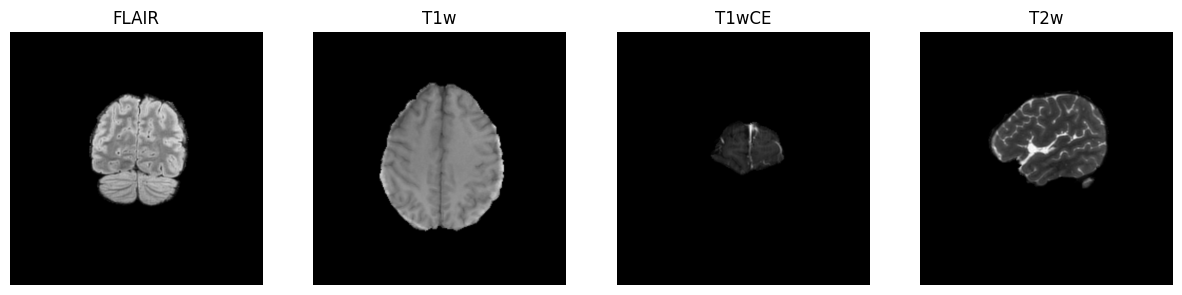

In [13]:
## Looking into all 4 types of Images

plt.figure(figsize=(15,6))
plt.subplot(1,4,1)
FLAIR = pydicom.dcmread(train_dir+"/00000/FLAIR/Image-100.dcm")
FLAIR = FLAIR.pixel_array
print("FLAIR SHAPE:",FLAIR.shape)
plt.imshow(FLAIR,cmap='grey')
plt.title("FLAIR")
plt.axis("off")
plt.subplot(1,4,2)
T1w = pydicom.dcmread(train_dir+"/00000/T1w/Image-25.dcm")
T1w = T1w.pixel_array
print("T1w SHAPE:",T1w.shape)
plt.imshow(T1w,cmap='grey')
plt.title("T1w")
plt.axis("off")
plt.subplot(1,4,3)
T1wCE = pydicom.dcmread(train_dir+"/00000/T1wCE/Image-100.dcm")
T1wCE = T1wCE.pixel_array
print("T1wCE SHAPE:",T1wCE.shape)
plt.imshow(T1wCE,cmap='grey')
plt.title("T1wCE")
plt.axis("off")
plt.subplot(1,4,4)
T2w = pydicom.dcmread(train_dir+"/00000/T2w/Image-100.dcm")
T2w = T2w.pixel_array
print("T2w SHAPE:",T2w.shape)
plt.imshow(T2w,cmap='grey')
plt.title("T2w")
plt.axis("off")
plt.show()

In [14]:
np.mean(FLAIR)

np.float64(156.3585205078125)

In [15]:
FLAIR = pydicom.dcmread(train_dir+"/00000/FLAIR/Image-100.dcm")
FLAIR

Dataset.file_meta -------------------------------
(0002,0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['DERIVED', 'SECONDARY']
(0008,0016) SOP Class UID                       UI: MR Image Storage
(0008,0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.8.498.10904131910506455574025613086762249469
(0008,0050) Accession Number                    SH: '00000'
(0008,0060) Modality                            CS: 'MR'
(0008,103E) Series Description                  LO: 'FLAIR'
(0010,0010) Patient's Name                      PN: '00000'
(0010,0020) Patient ID                          LO: '00000'
(0018,0023) MR Acquisition Type                 CS: '3D'
(0018,0050) Slice Thickness                     DS: '1.2'
(0018,0081) Echo Time                           DS: None
(0018,0082) Inversion Tim

In [16]:
FLAIR.SliceThickness

'1.2'

## **Preprocessing Images**

In [64]:
## Collecting the images
flair_paths = glob('/mnt/nvme_disk2/User_data/nc36192d/rushi/Learnings/kaggle_datasets/rsna_dataset/train/00674/FLAIR/*.dcm')
dcm_imgs = [pydicom.dcmread(sli) for sli in flair_paths]
print("Number of slices:\t",len(dcm_imgs))

Number of slices:	 200


In [65]:
## Sorting the Images according to the Z-axis
dcm_imgs.sort(key= lambda X: X.ImagePositionPatient[2])

In [66]:
## stacking the images
stacked_img = np.stack([im.pixel_array for im in dcm_imgs])
print("Shape of the stacked Image:\t",stacked_img.shape)

Shape of the stacked Image:	 (200, 512, 512)


In [67]:
## Looking ito the pixels
r = random.randint(0,stacked_img.shape[0])
print("minimum pixel value:\t",np.min(stacked_img[r]))
print("maximum pixel value:\t",np.max(stacked_img[r]))
print("Average pixel value:\t",np.mean(stacked_img[r]))

minimum pixel value:	 0
maximum pixel value:	 0
Average pixel value:	 0.0


In [21]:
np.max(stacked_img[r])

np.int16(0)

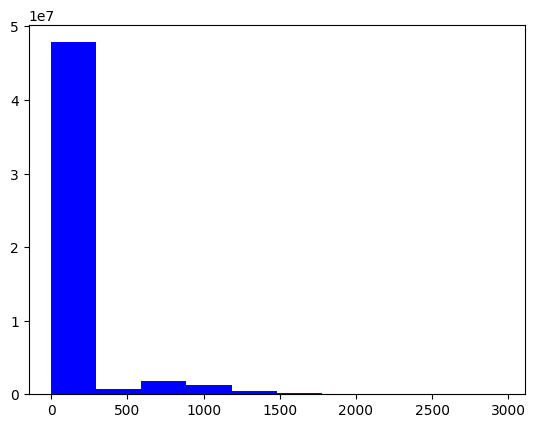

In [22]:
## plotting the distrubution of the pixel values in the images
plt.hist((stacked_img).flatten(),color='blue')
plt.show()

## **Converting to the HU**

In [68]:
## function to convert values to HU
def get_HU(dicom_slices,images):
    stacked_images = images.copy()
    for slice in range(len(dicom_slices)):
        intercept = dicom_slices[slice].RescaleIntercept
        slope = dicom_slices[slice].RescaleIntercept

        ## if slope is less than 1 multiply it to the eac pixel value
        if slope != 1:
            #dicom_slices[slice] = np.int16(slope) * dicom_slices[slice]
            stacked_images[slice] = slope * stacked_images[slice].astype(np.float64)
            stacked_images[slice] = stacked_images[slice].astype(np.int16)
        
        ## add intercept to the slices
        #stacked_images[slice] += np.int16(intercept)
        stacked_images[slice] = stacked_images[slice].astype(np.int16) + np.int16(intercept)
    return stacked_images

In [69]:
new_stacked_img = get_HU(dcm_imgs,stacked_img)

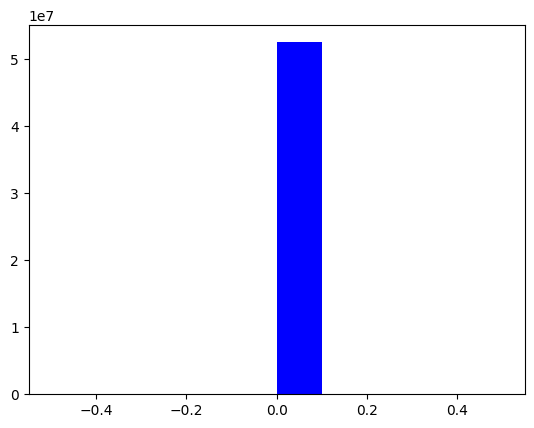

In [25]:
## plotting the distrubution of the pixel values in the images
plt.hist((new_stacked_img/255).flatten(),color='blue')
plt.show()

## **Handling the pixel spacing**

In [26]:
import scipy

In [70]:
## Function to adust pixel spacing
def adjust_pixel_space(dicom_slices,stacked_image,desired_spacing = [1,1,1]):
    image = stacked_image.copy()
    slice_thickness = dicom_slices[0].SliceThickness
    pixel_spacing = [float(dicom_slices[0].PixelSpacing[0]), float(dicom_slices[0].PixelSpacing[1])]
    resize_factor = np.array([slice_thickness] + pixel_spacing,dtype=np.float32)/desired_spacing

    new_shape = np.round(image.shape *resize_factor)

    new_resize_factor = new_shape / image.shape

    new_spacing = desired_spacing / new_resize_factor

    image = scipy.ndimage.interpolation.zoom(image, new_spacing, mode='nearest')

    return image


In [71]:
print("Shape BEFORE adjusting:\t",stacked_img.shape)
pixel_adjusted_img = adjust_pixel_space(dcm_imgs,new_stacked_img)
print("shape AFTER adjusting:\t",pixel_adjusted_img.shape)

Shape BEFORE adjusting:	 (200, 512, 512)


/tmp/ipykernel_2948398/891089229.py:14: DeprecationWarning: Please import `zoom` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  image = scipy.ndimage.interpolation.zoom(image, new_spacing, mode='nearest')


shape AFTER adjusting:	 (167, 1024, 1024)


In [29]:
np.array(pixel_adjusted_img).shape

(167, 1024, 1024)

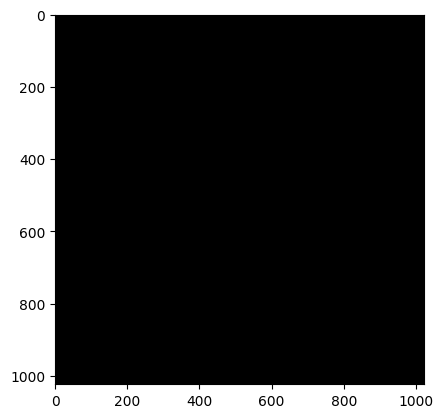

In [72]:
plt.imshow(pixel_adjusted_img[15],cmap='grey')

In [31]:
import numpy as np
import cv2

def resize_slices(image_array, target_size=(512, 512)):
    """
    Resize each slice of a 3D image to the given target size while preserving depth.
    
    :param image_array: 3D numpy array (depth, height, width)
    :param target_size: Tuple (new_height, new_width)
    :return: 3D numpy array with shape (depth, 512, 512)
    """
    depth = image_array.shape[0]  # Preserve number of slices (variable)
    resized_slices = np.zeros((depth, target_size[0], target_size[1]), dtype=image_array.dtype)

    for i in range(depth):
        resized_slices[i] = cv2.resize(image_array[i], target_size, interpolation=cv2.INTER_LINEAR)

    return resized_slices


## **How Interpolation works?**
more more detailed explaination:
https://annmay10.medium.com/resizing-images-using-various-interpolation-techniques-4b99800999f2

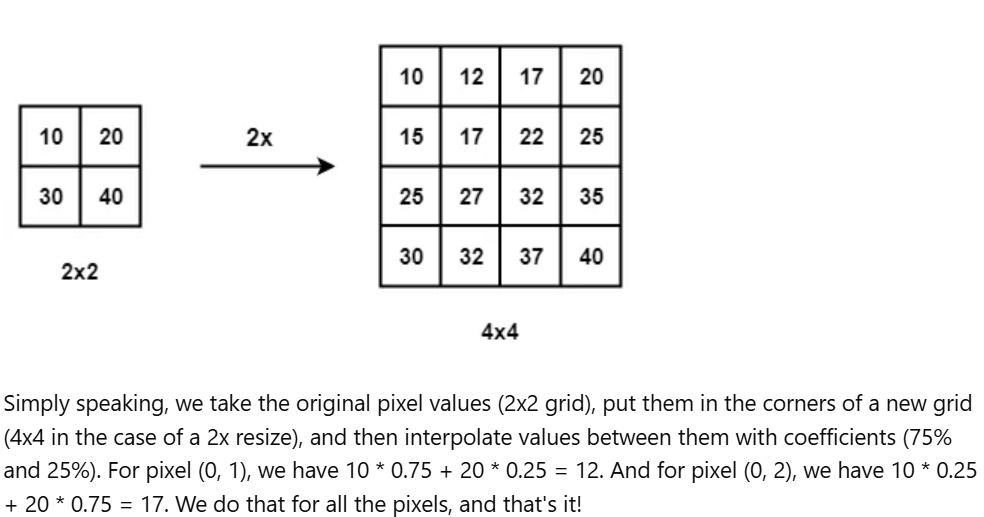

In [32]:
# Resize to (512,512) while keeping depth = 20
resized_image = resize_slices(pixel_adjusted_img)

print(resized_image.shape)  # Output: (20, 512, 512)


(167, 512, 512)


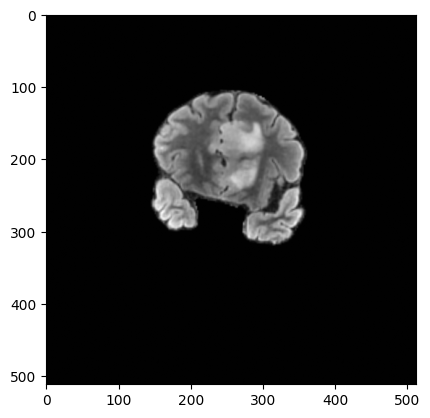

In [33]:
plt.imshow(resized_image[15],cmap='grey')

## **Vizualizing the resized images**

In [34]:
# # Video writer setup
# fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec
# fps = 10  # Frames per second
# out = cv2.VideoWriter('stacked_animation.mp4', fourcc, fps, (512, 512), isColor=False)

# for i in range(stacked_img.shape[0]):
#     frame = stacked_img[i].astype(np.uint8)  # Get slice
#     frame_colored = cv2.applyColorMap(frame, cv2.COLORMAP_JET)  # Apply colormap (optional)
#     out.write(frame)  # Write frame to video

# out.release()  # Save video file
# print("Animation saved as animation.mp4")


## **removing the slices with no image inside it**

In [35]:
np.mean(resized_image[15])

np.float64(91.73504257202148)

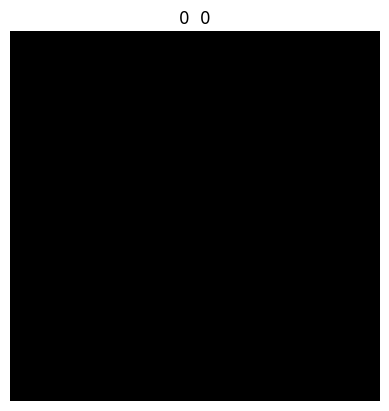

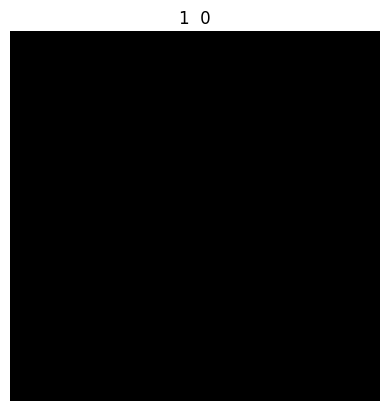

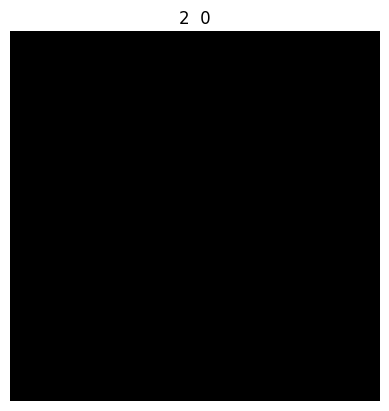

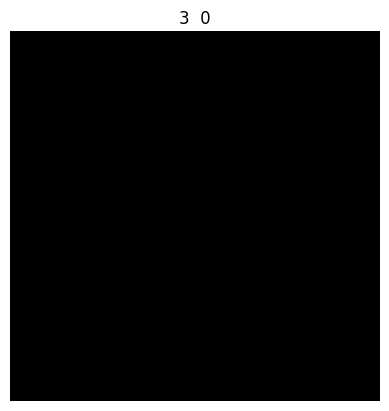

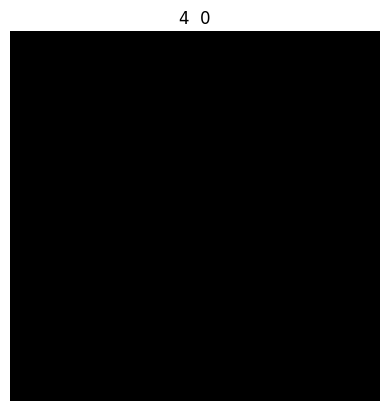

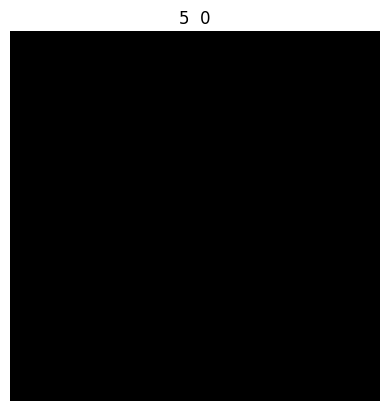

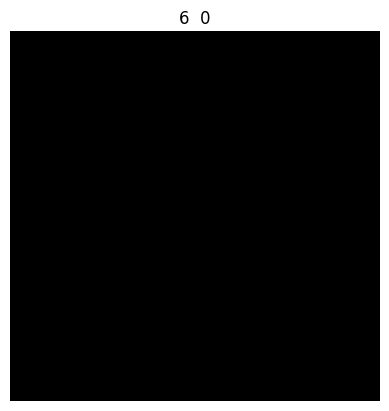

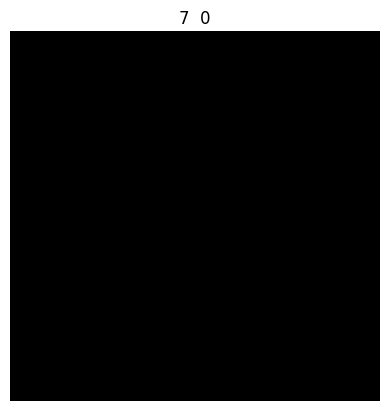

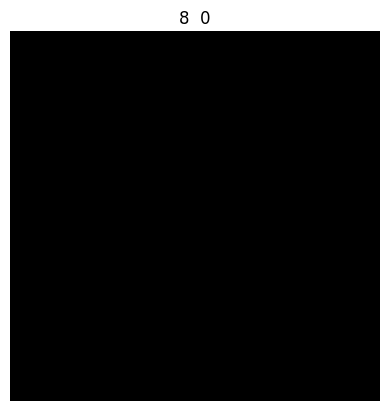

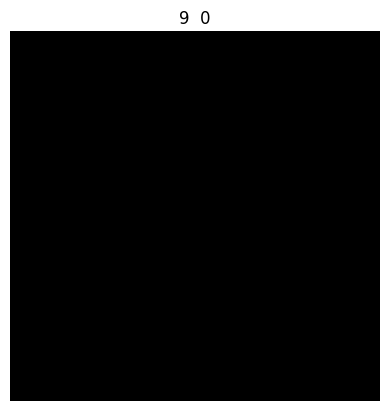

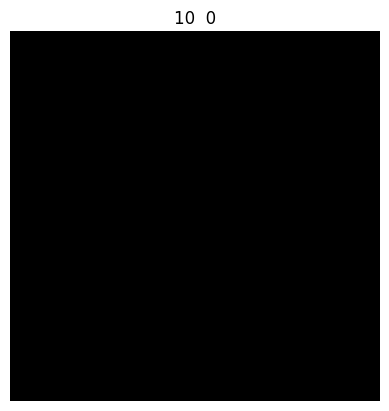

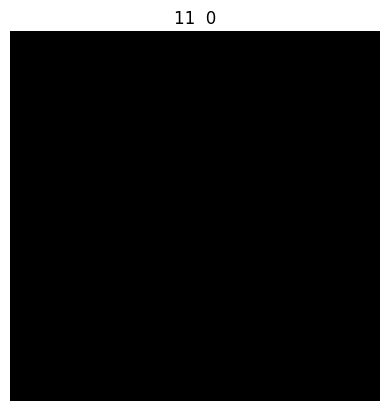

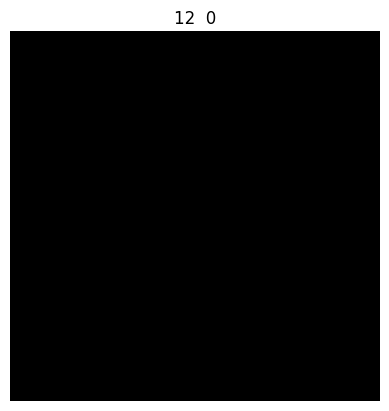

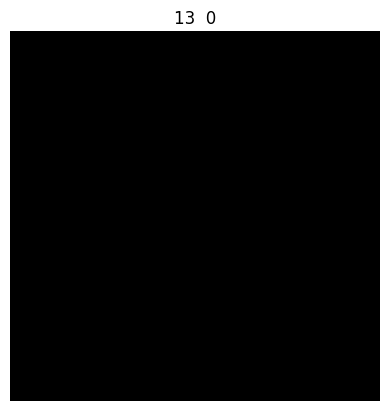

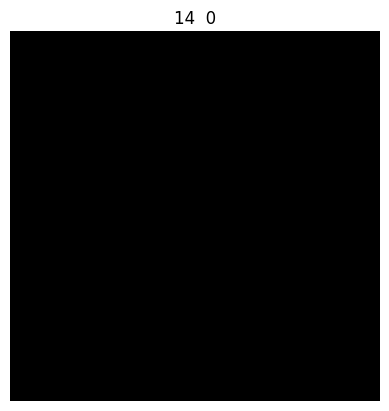

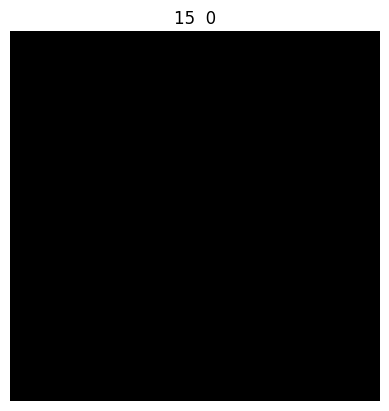

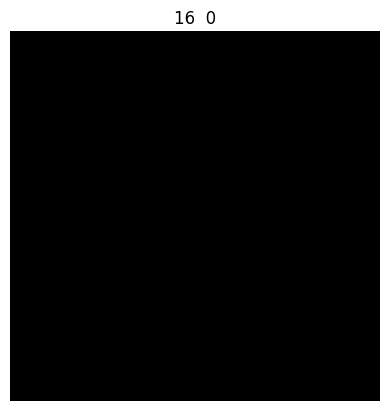

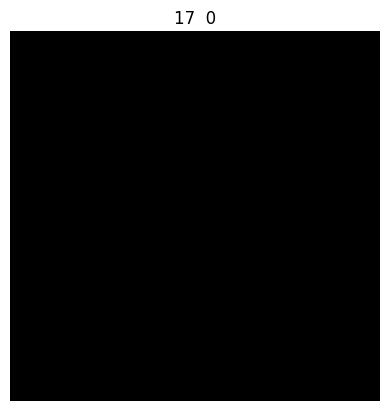

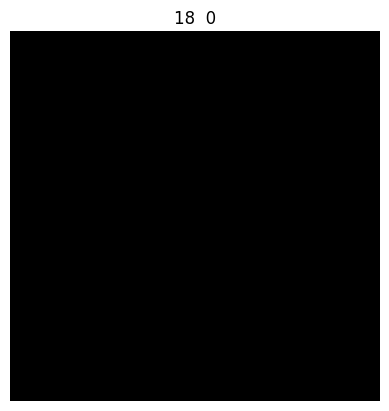

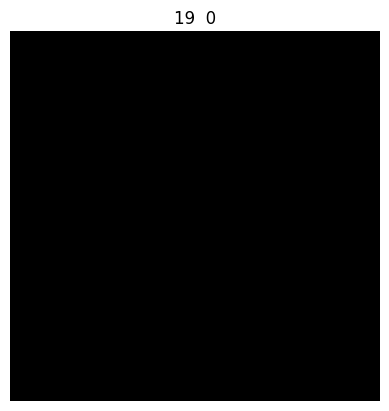

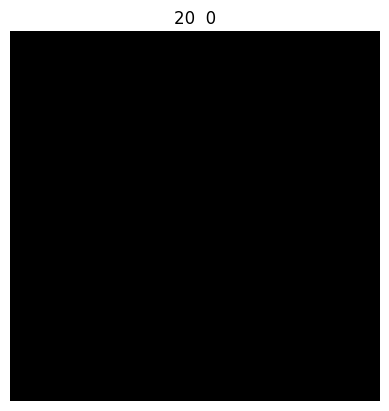

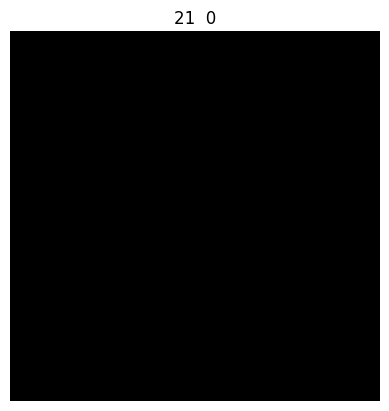

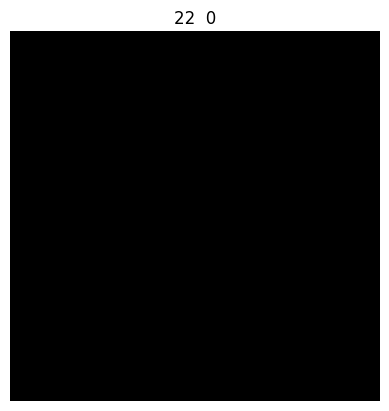

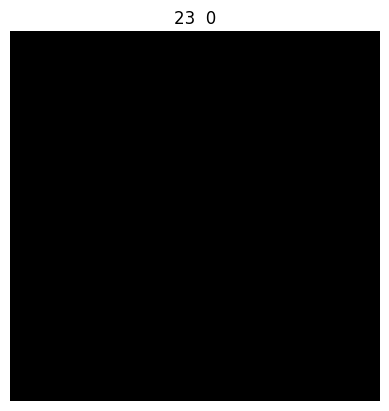

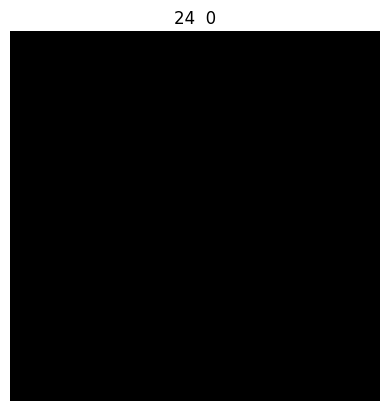

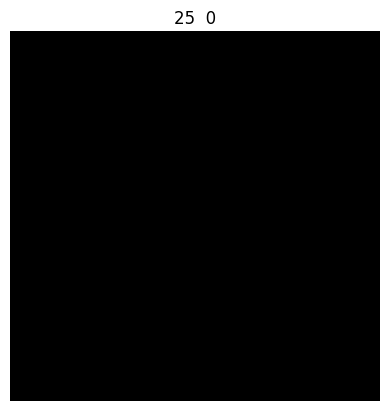

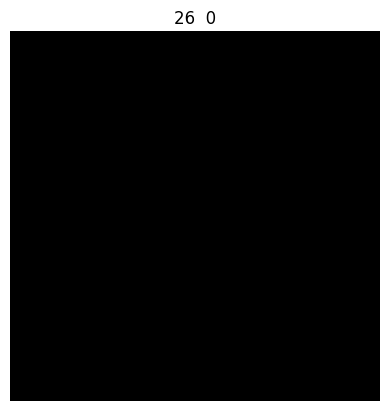

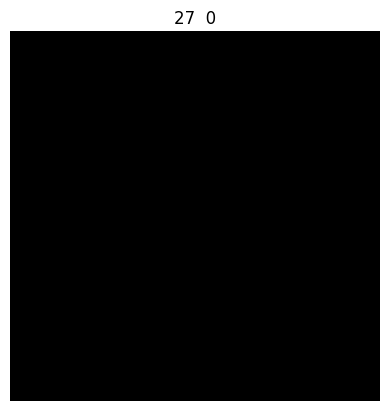

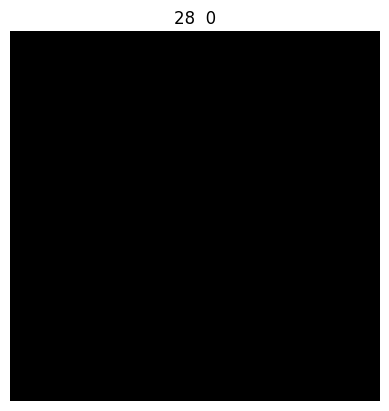

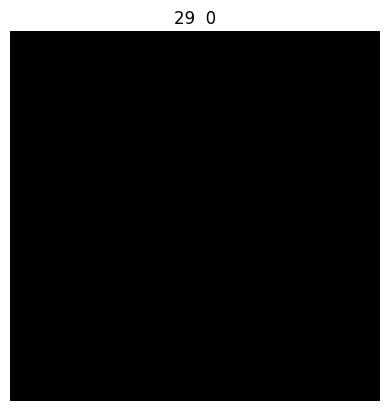

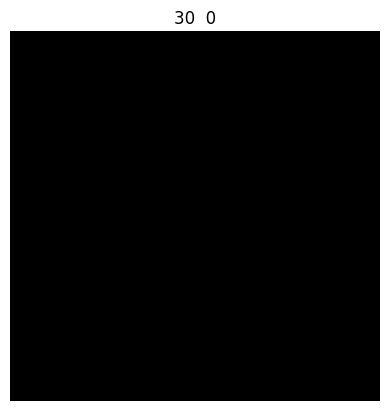

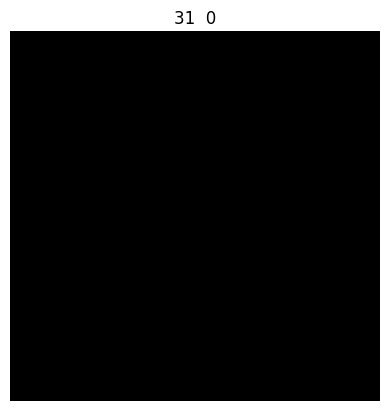

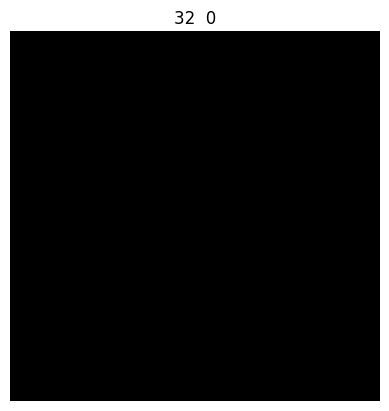

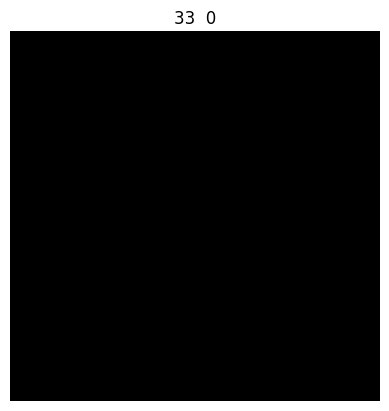

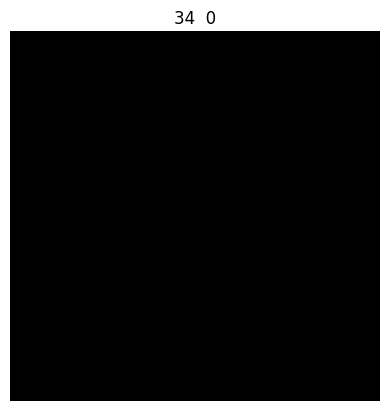

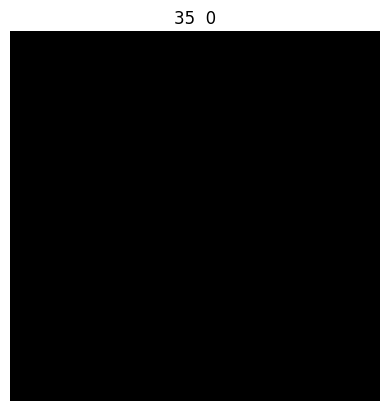

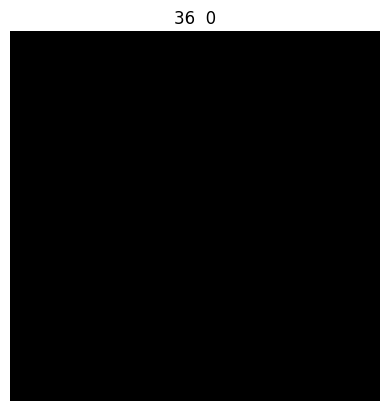

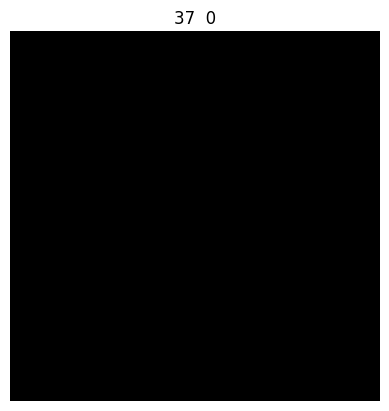

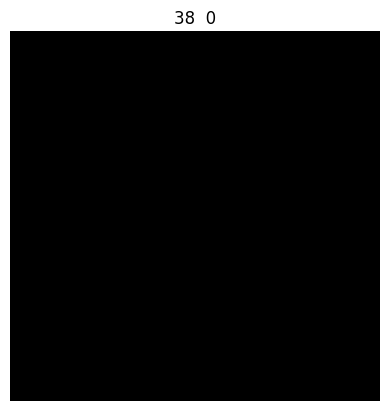

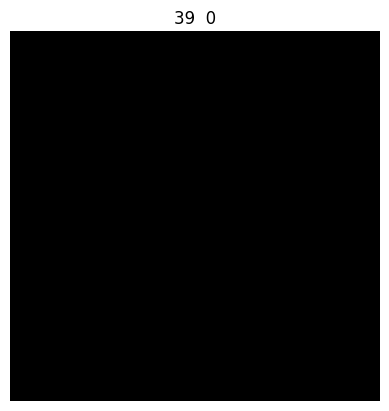

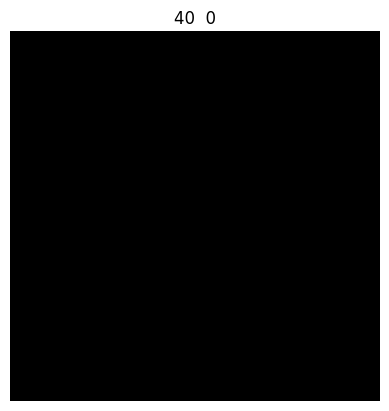

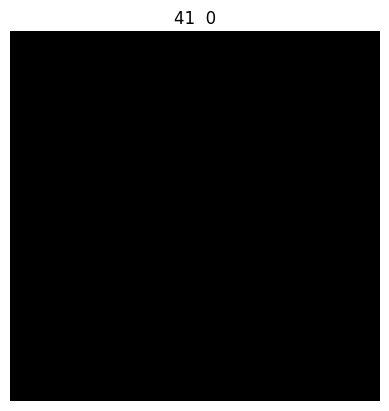

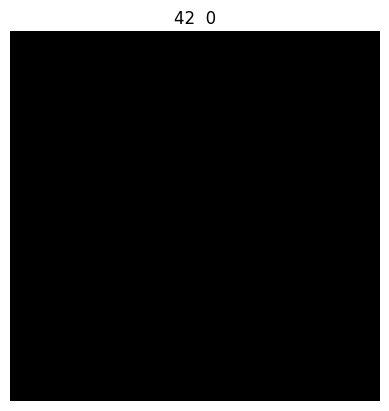

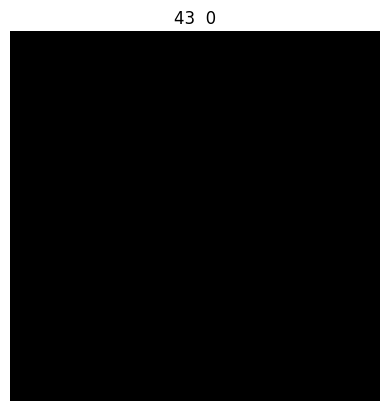

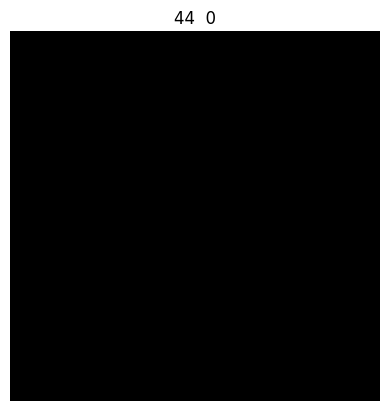

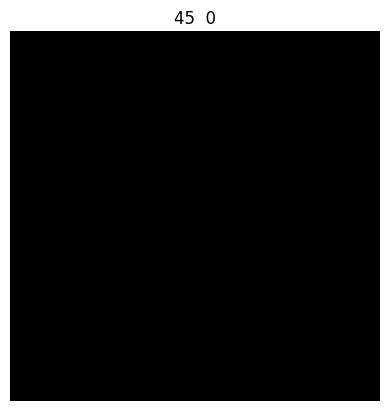

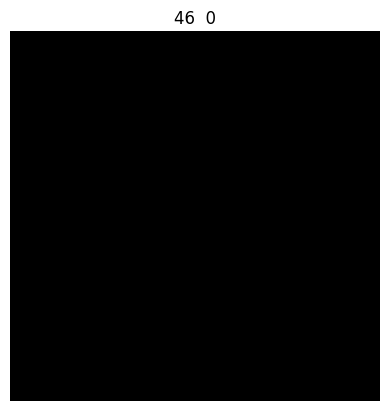

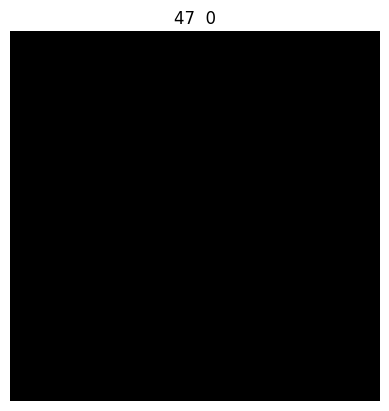

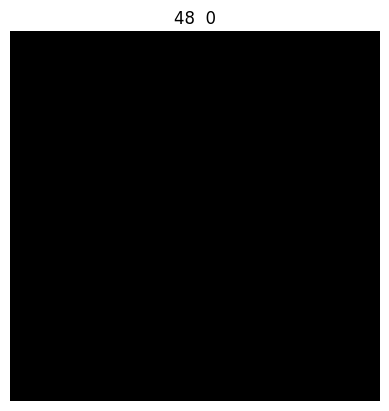

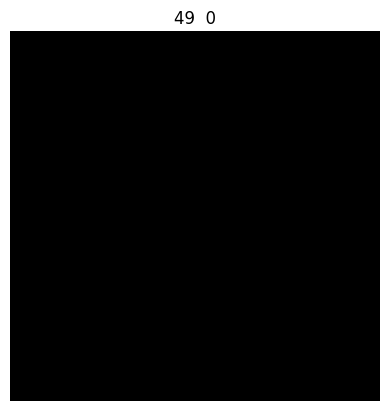

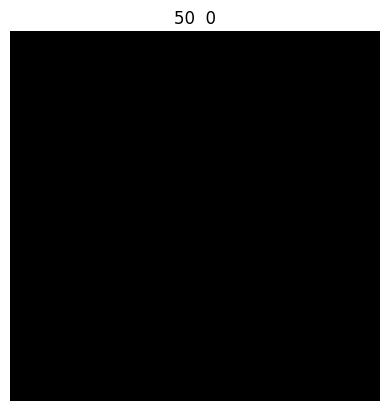

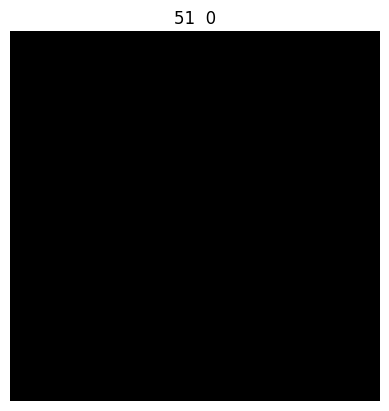

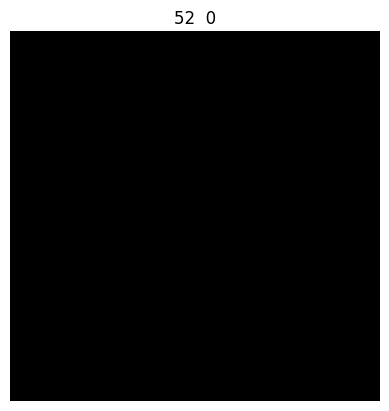

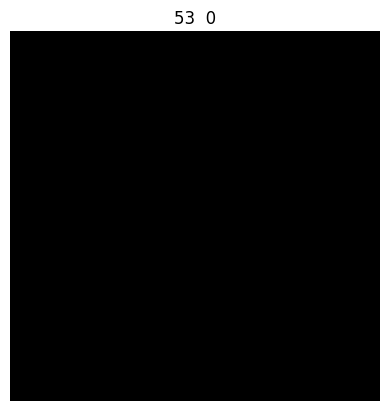

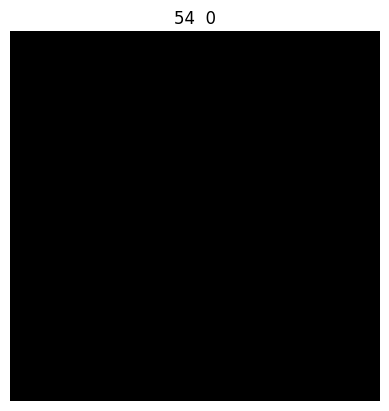

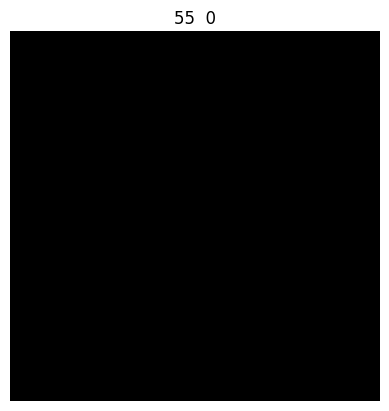

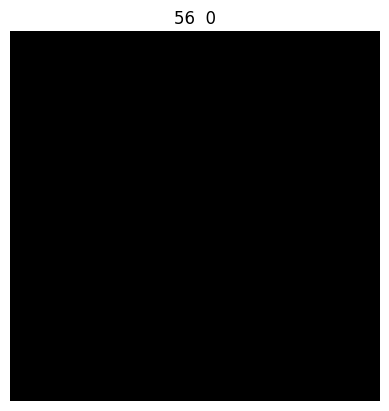

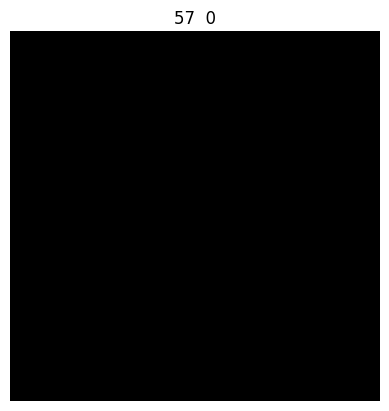

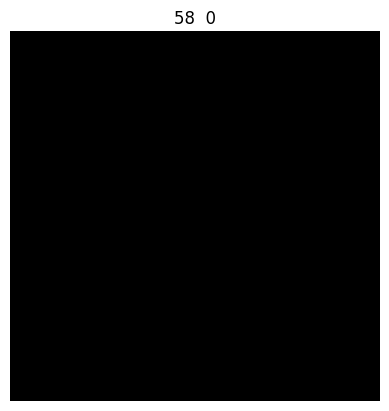

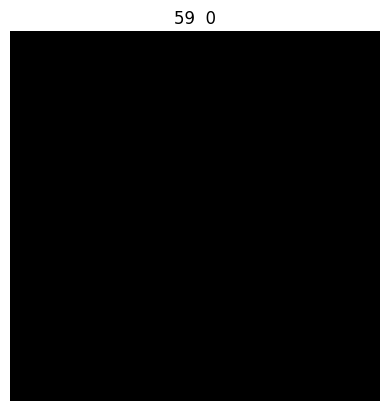

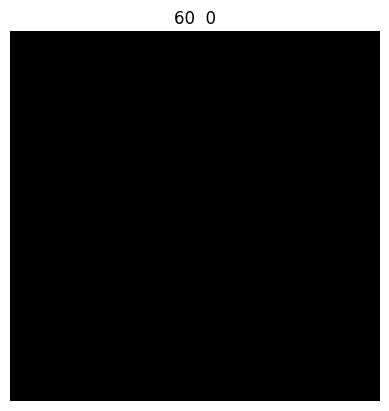

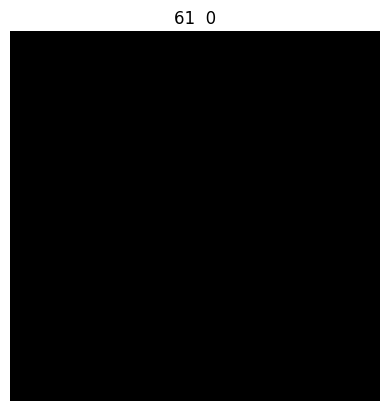

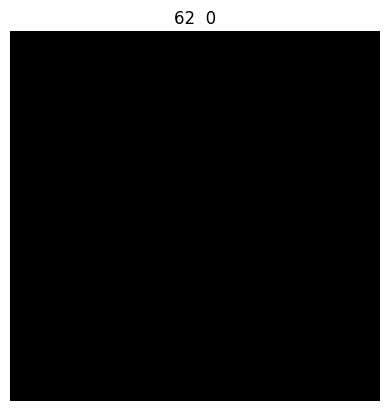

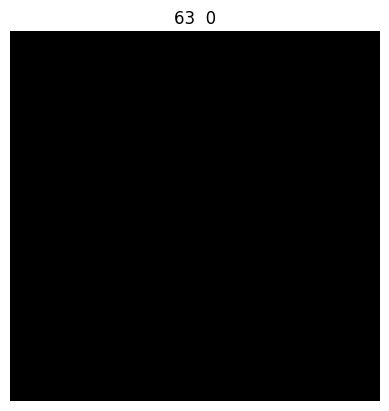

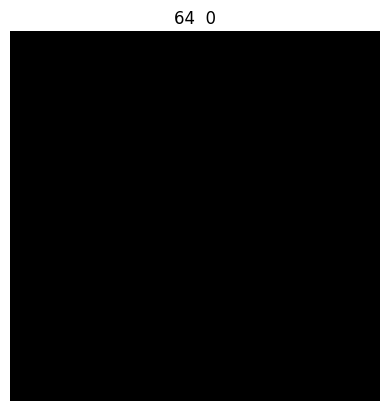

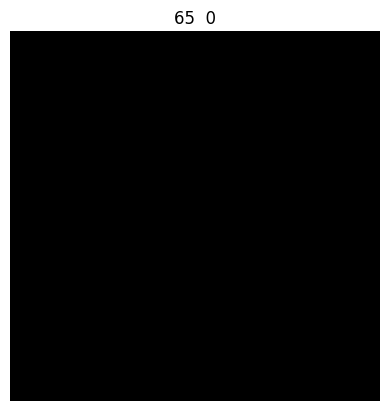

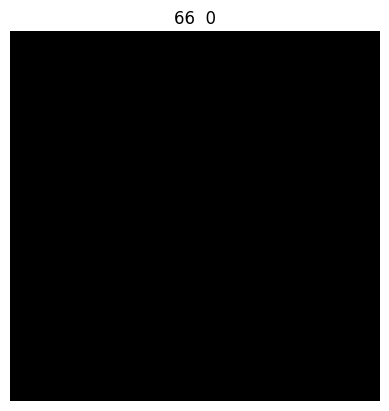

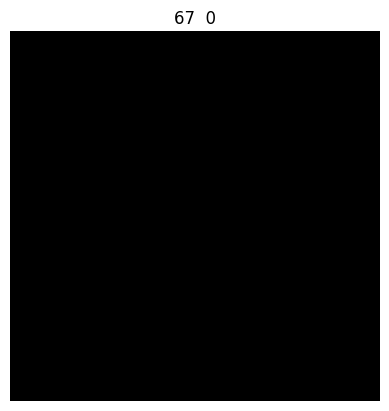

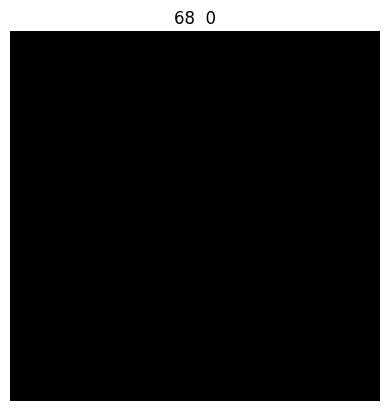

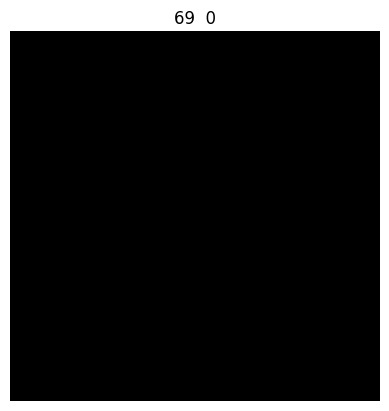

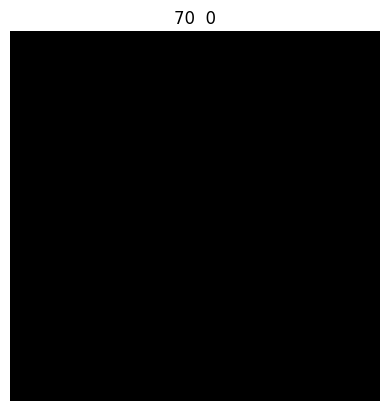

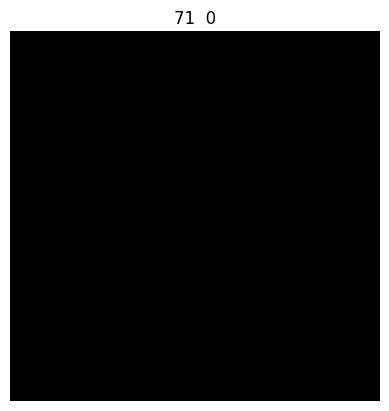

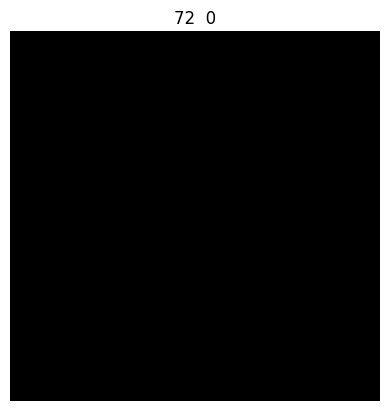

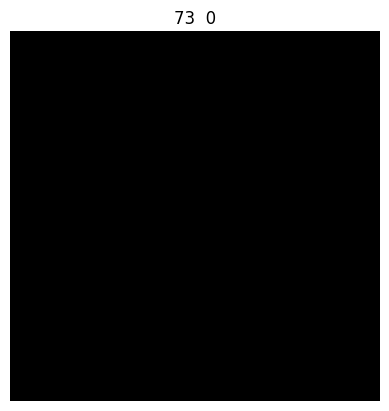

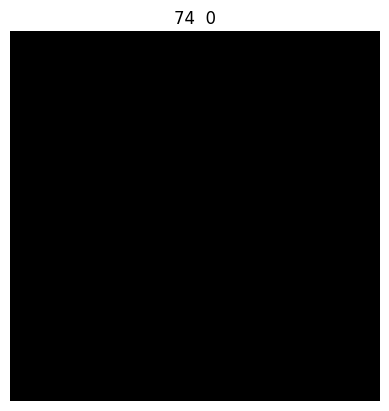

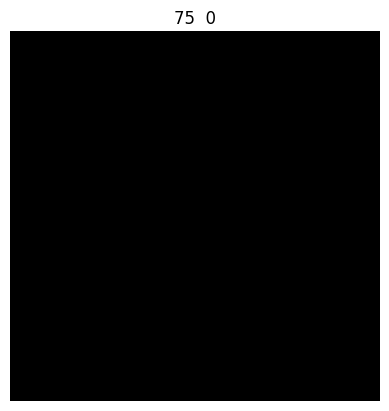

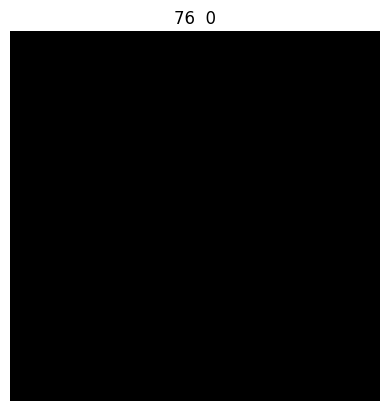

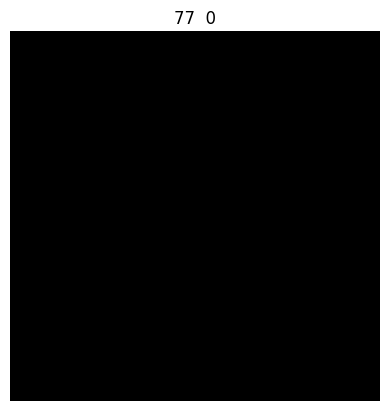

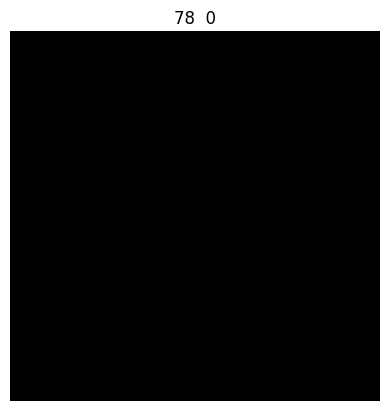

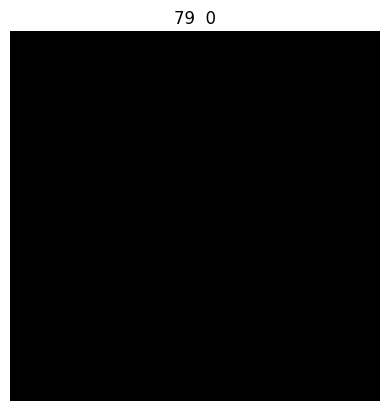

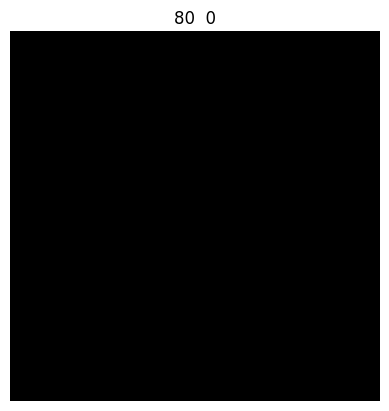

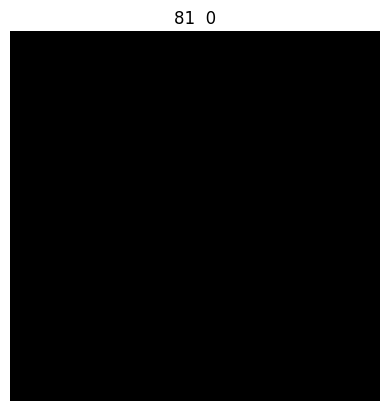

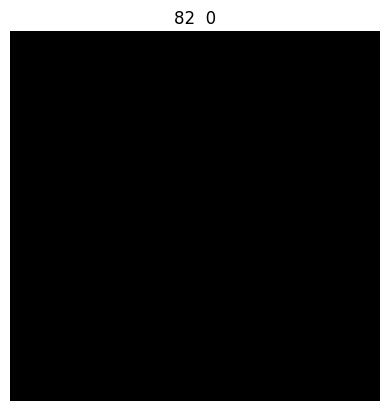

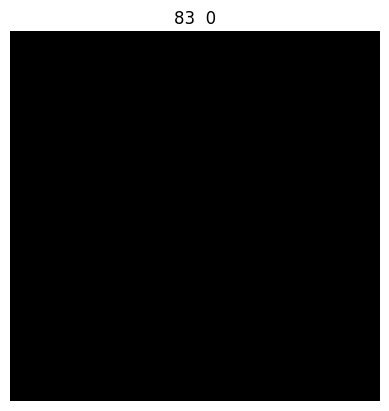

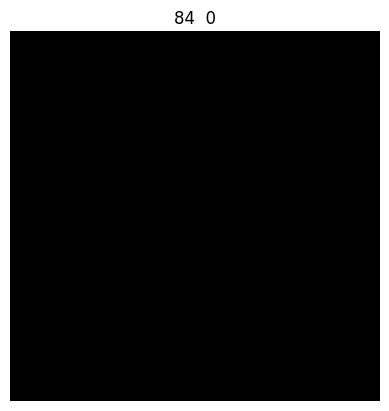

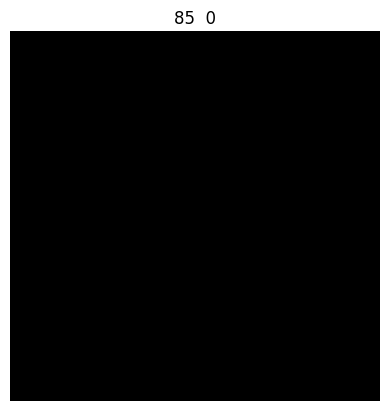

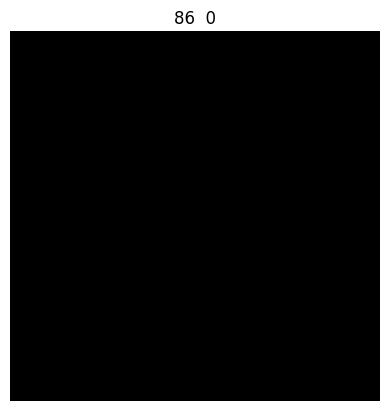

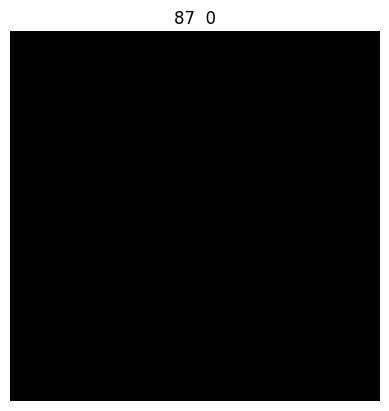

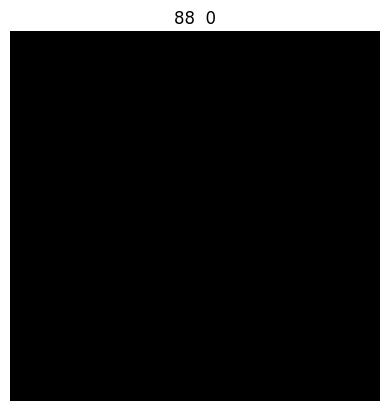

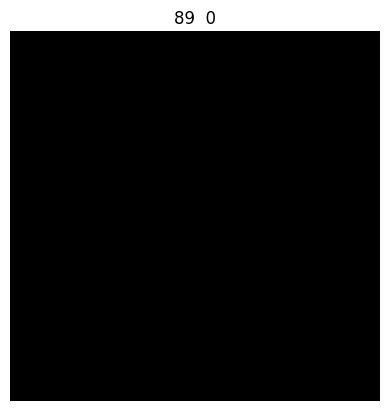

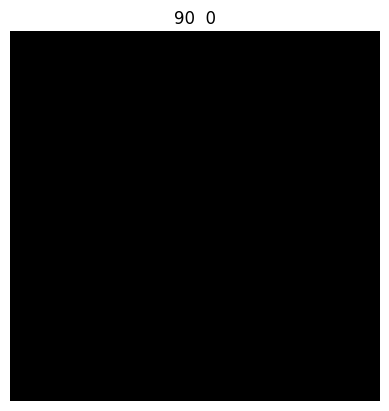

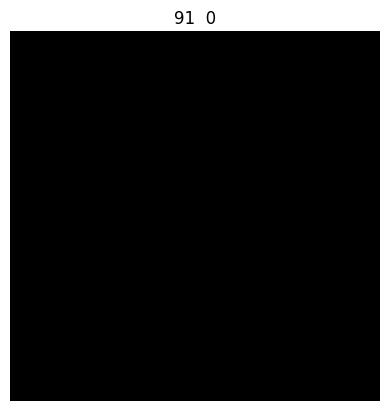

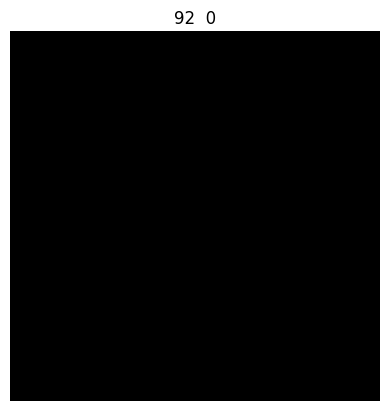

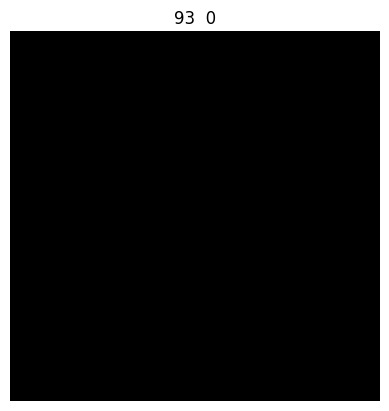

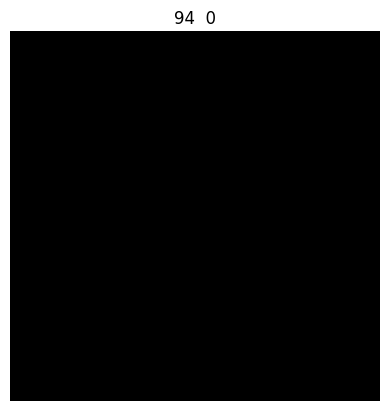

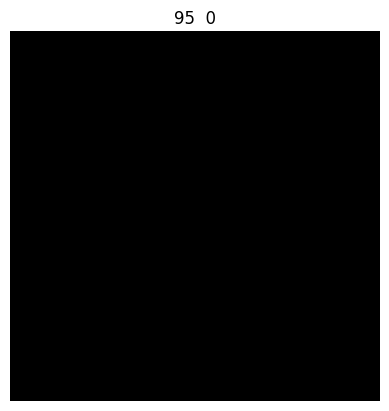

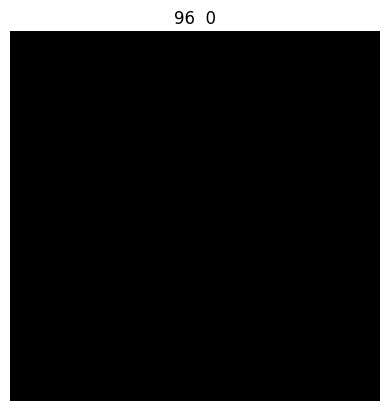

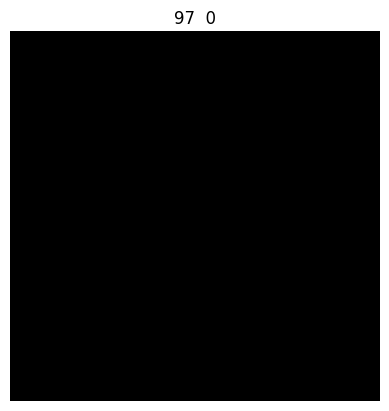

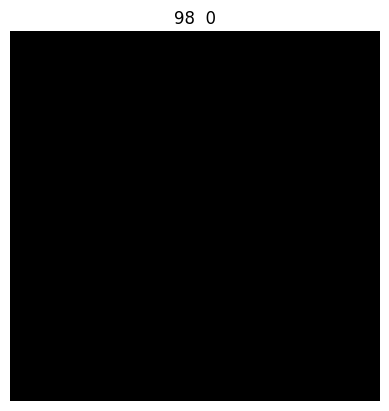

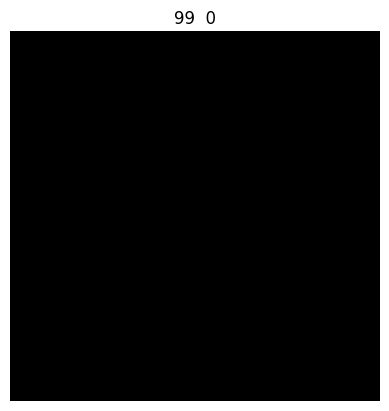

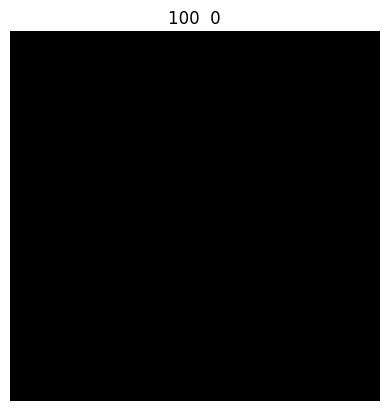

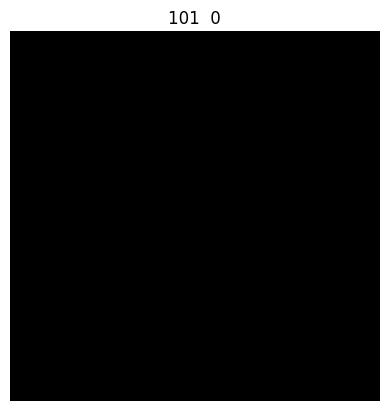

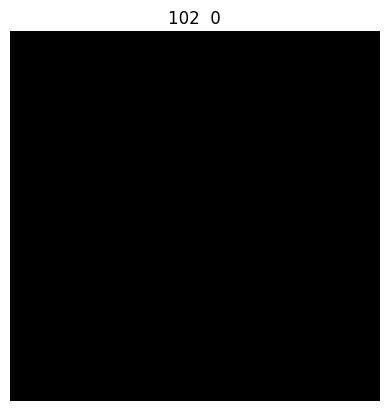

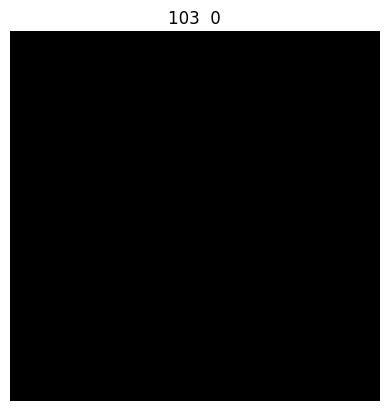

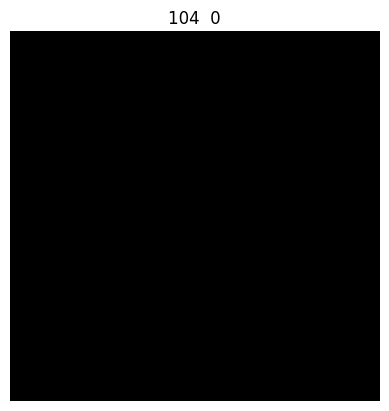

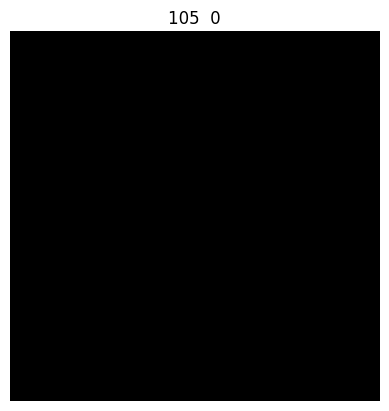

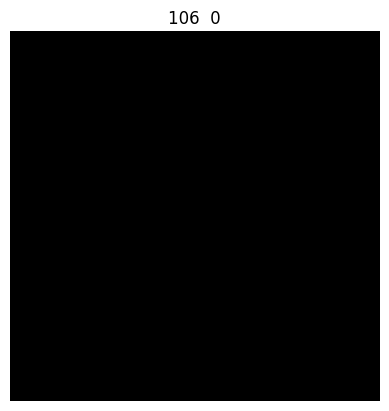

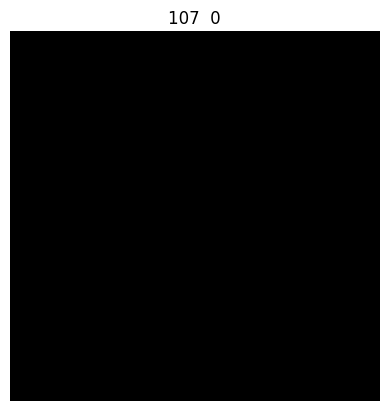

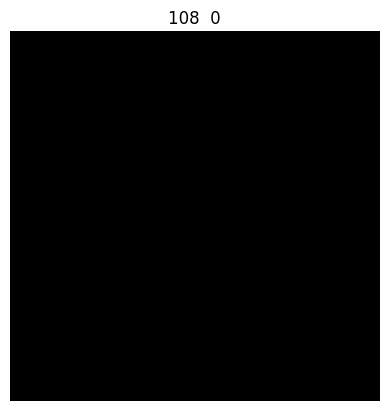

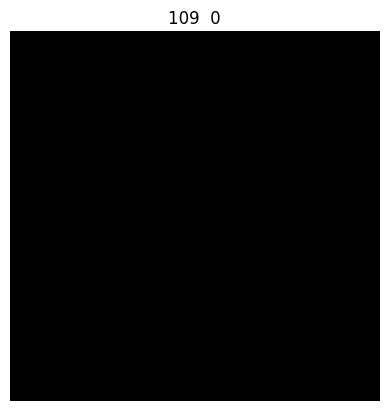

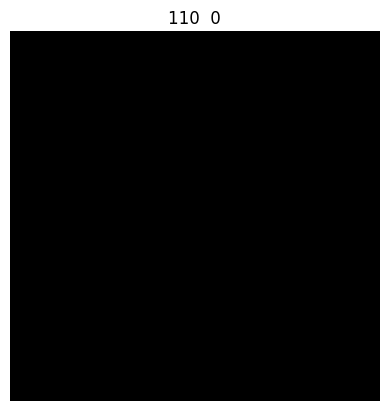

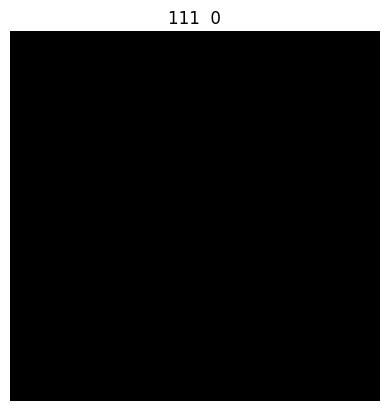

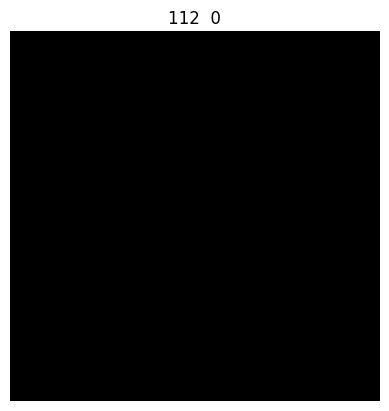

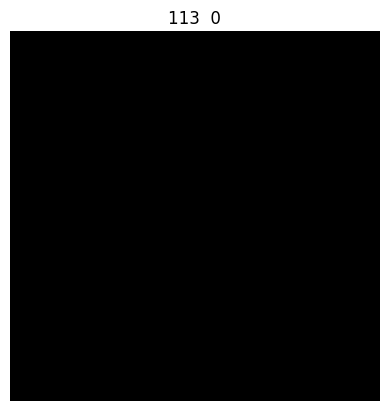

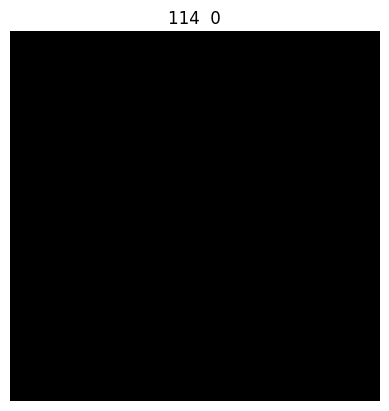

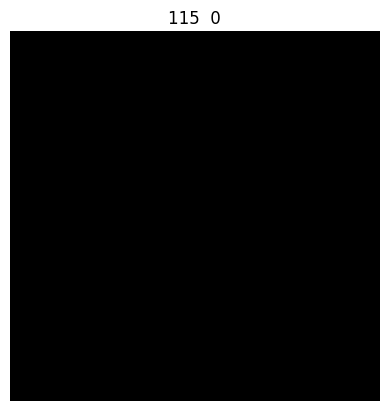

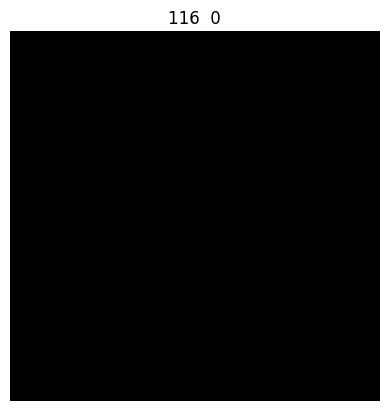

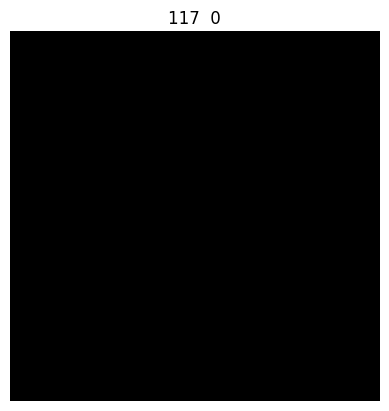

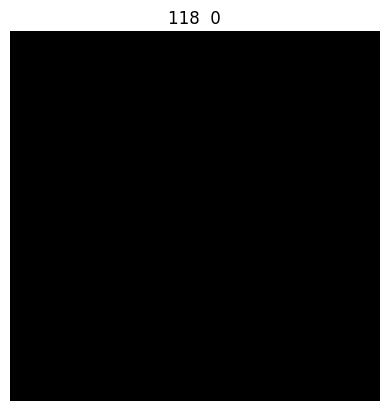

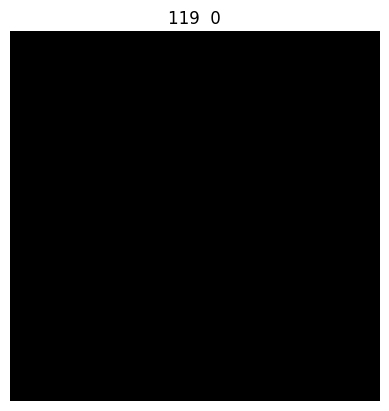

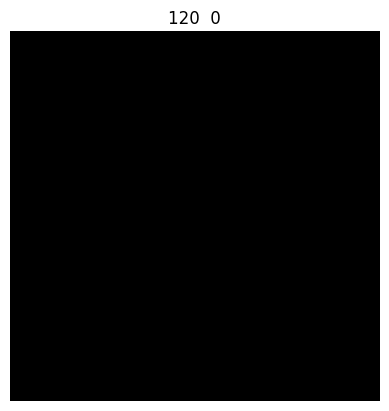

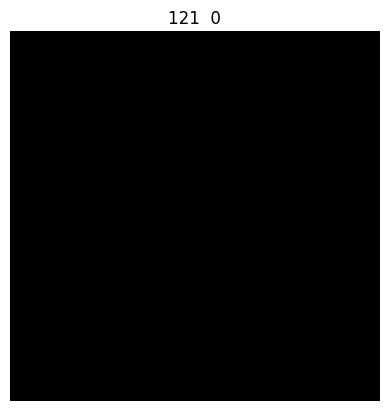

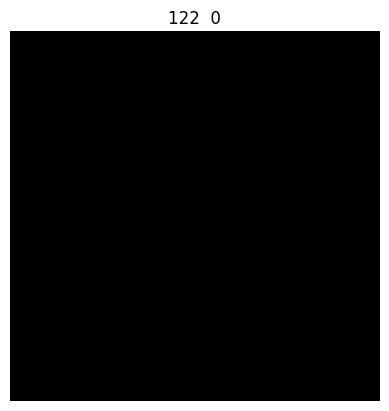

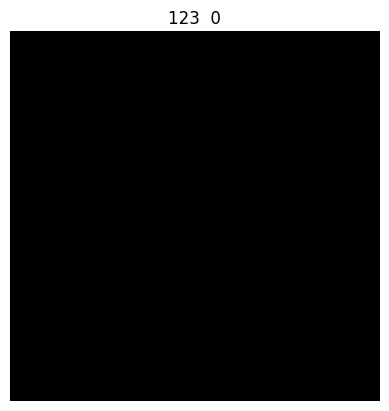

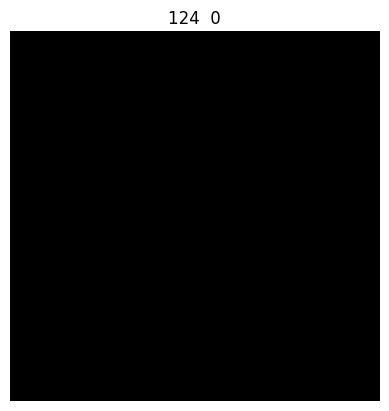

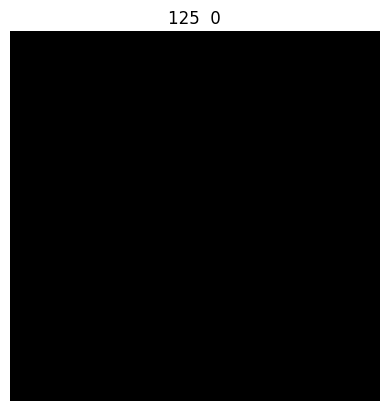

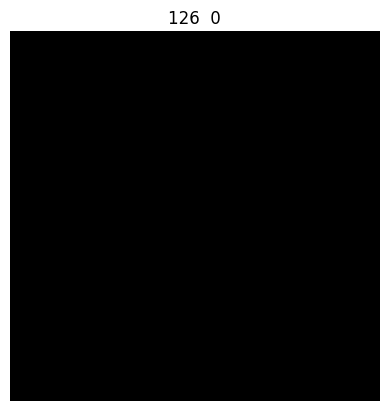

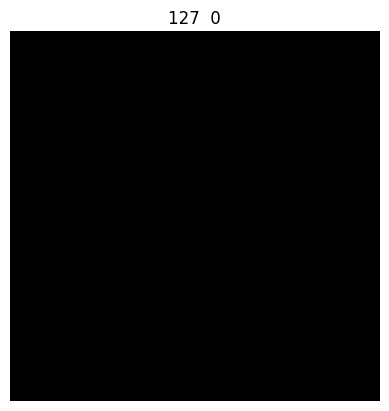

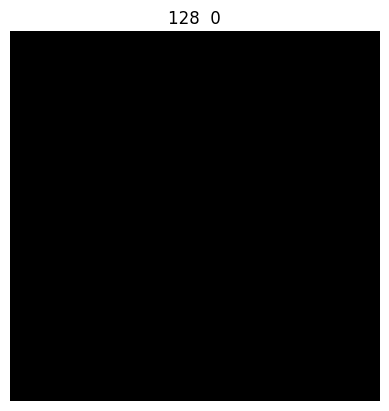

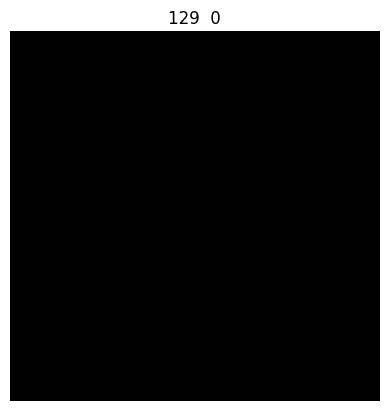

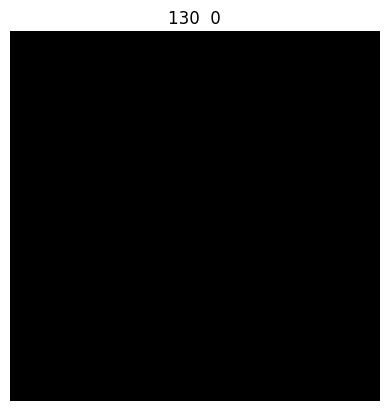

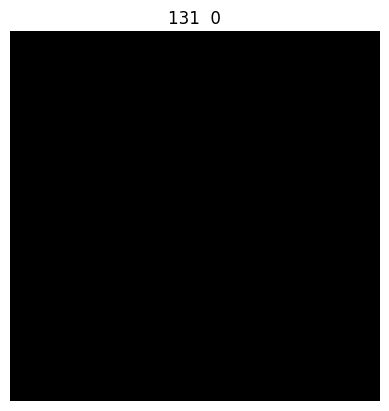

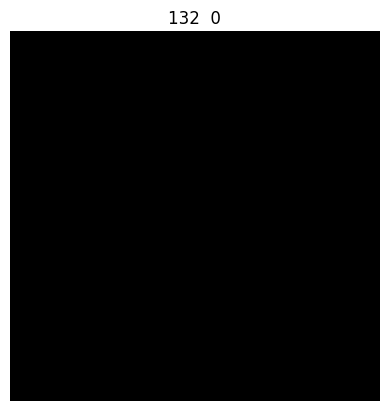

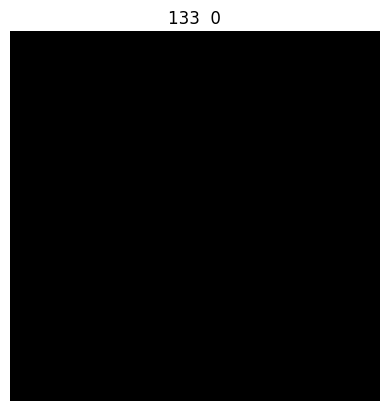

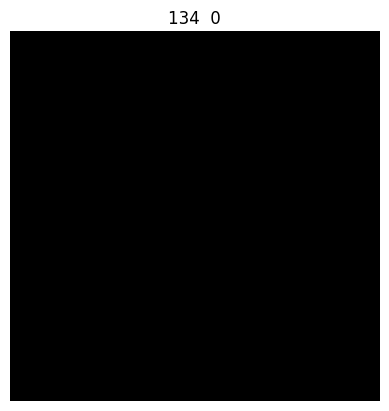

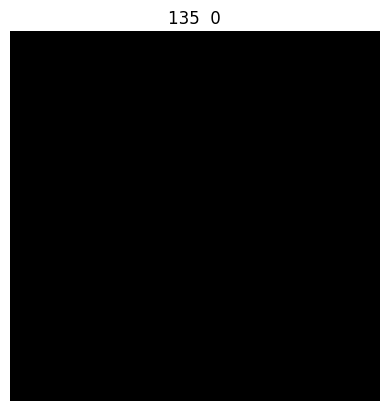

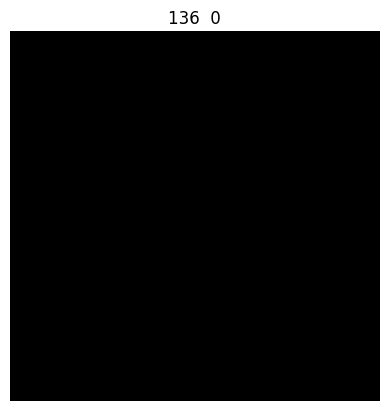

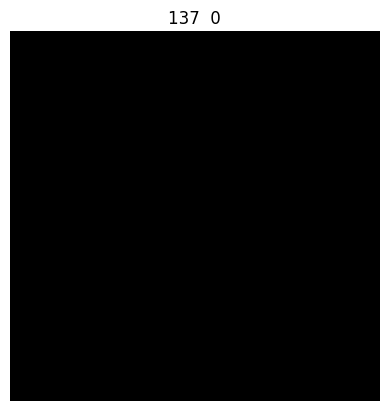

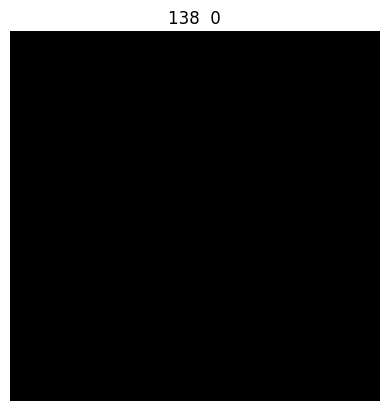

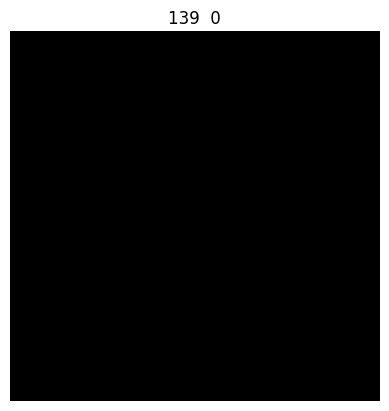

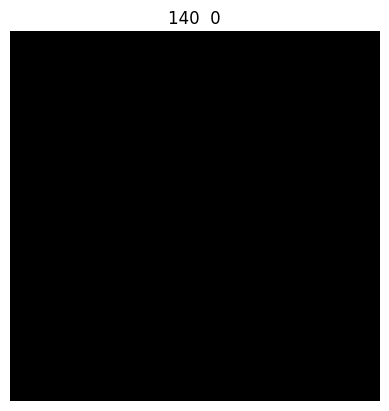

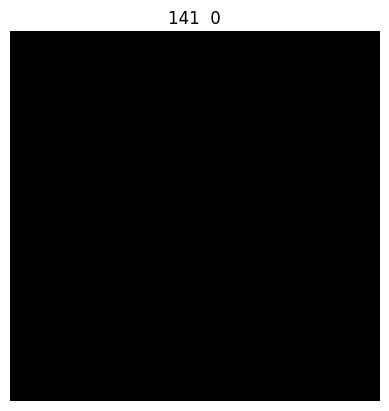

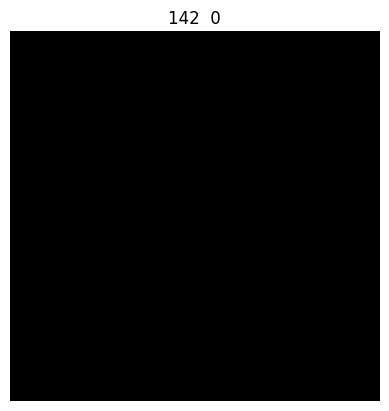

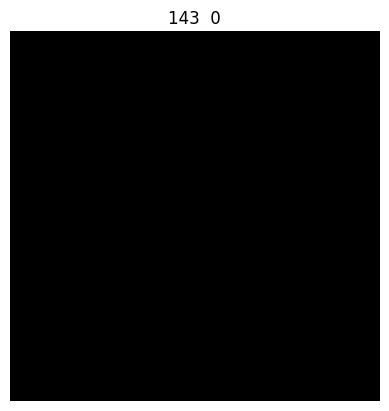

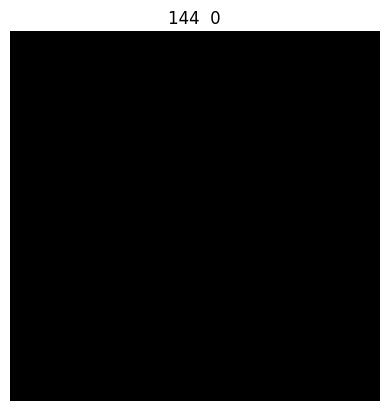

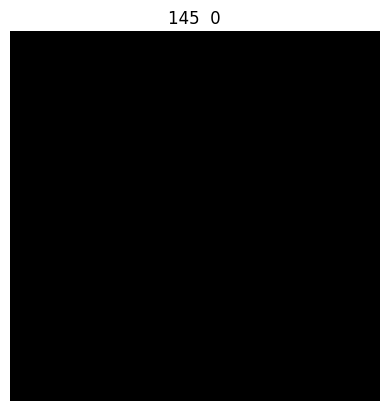

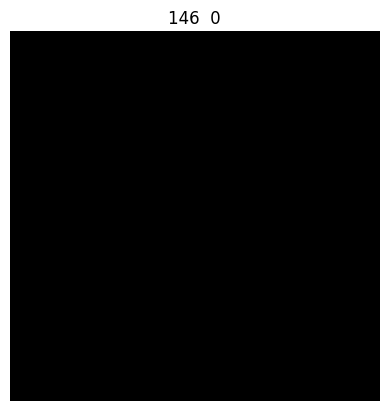

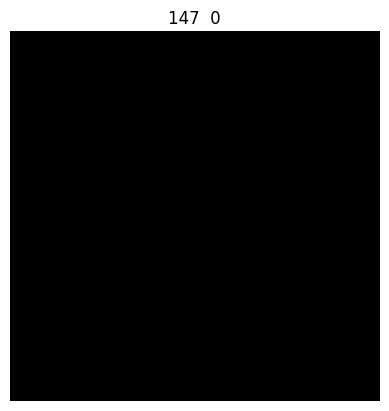

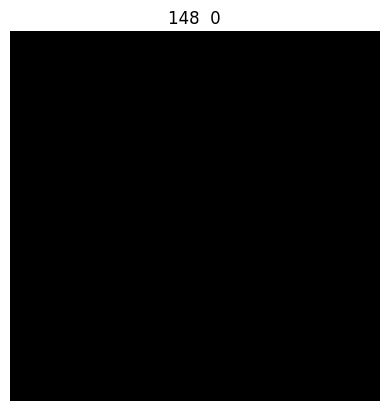

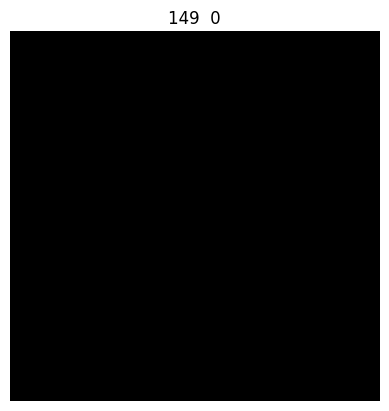

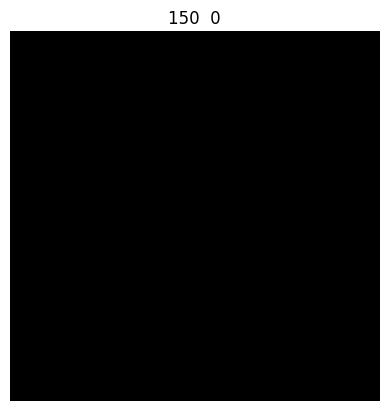

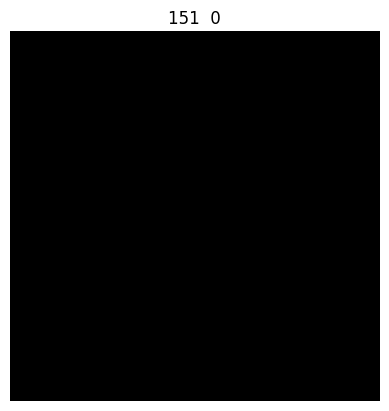

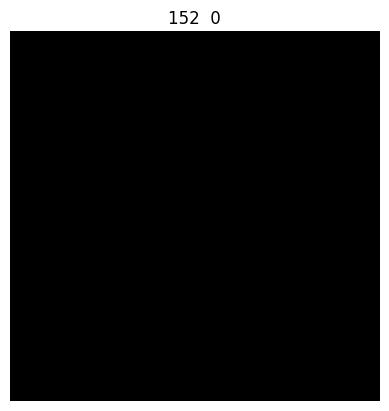

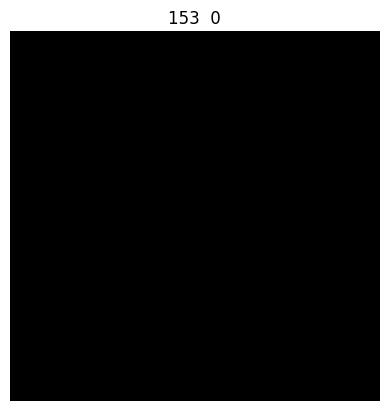

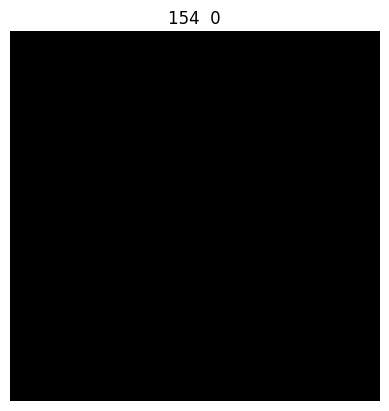

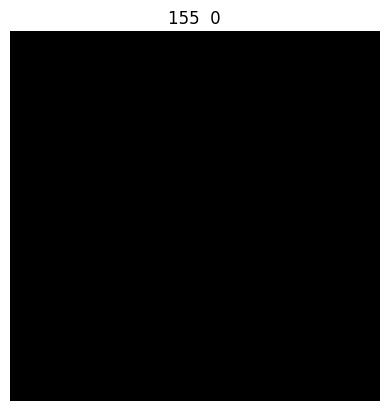

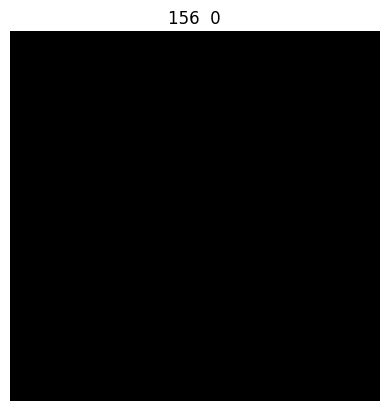

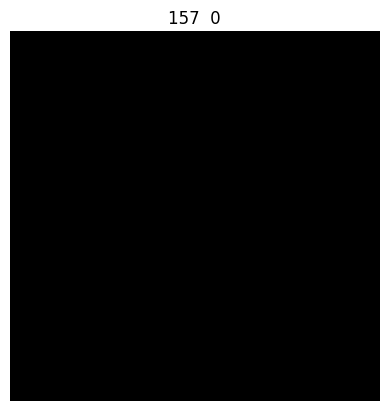

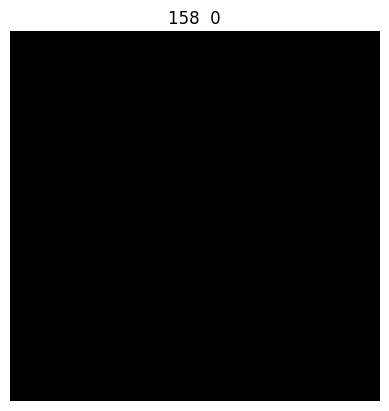

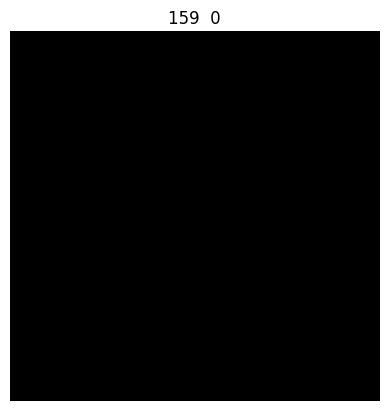

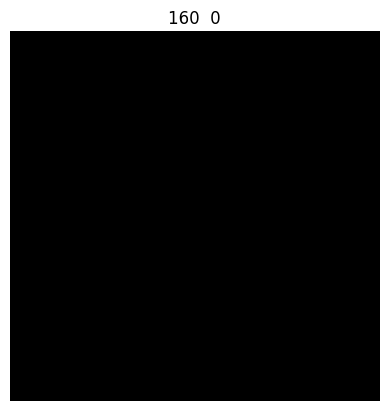

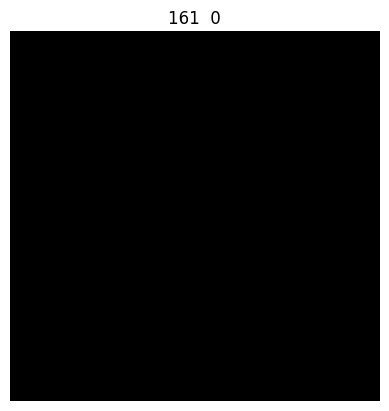

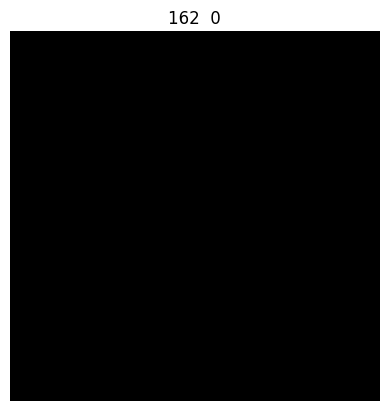

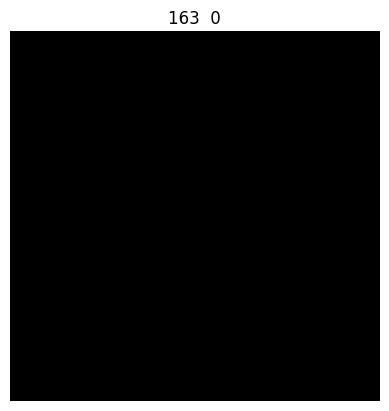

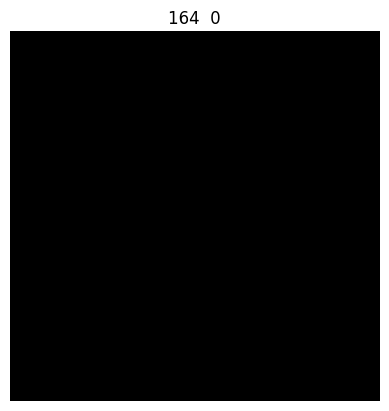

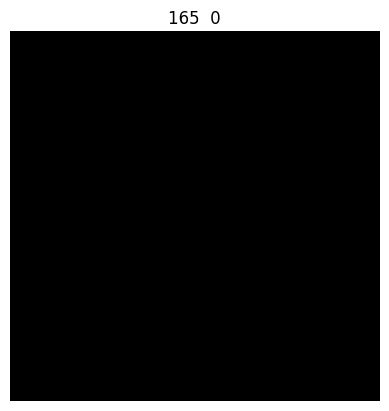

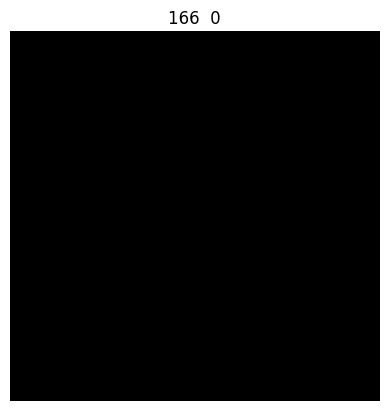

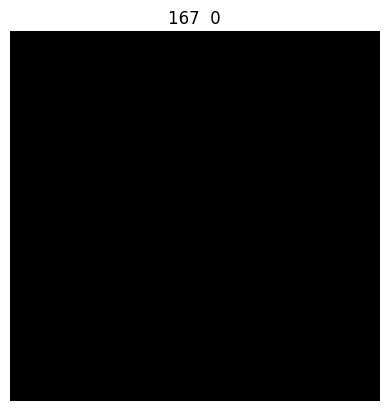

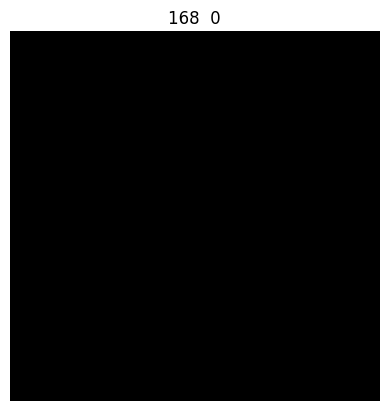

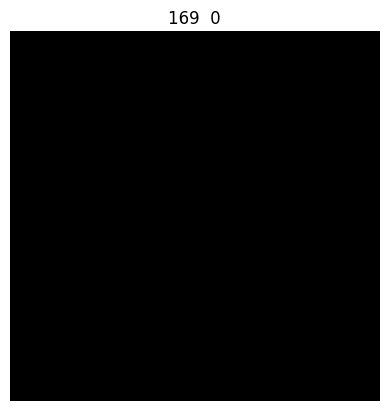

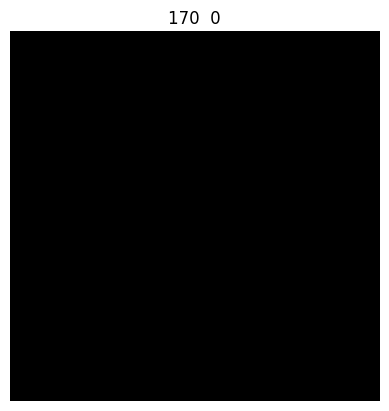

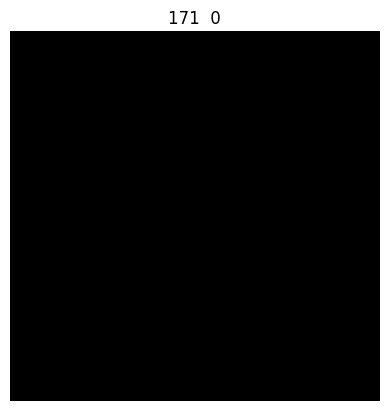

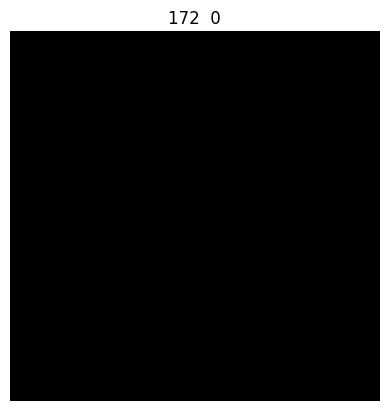

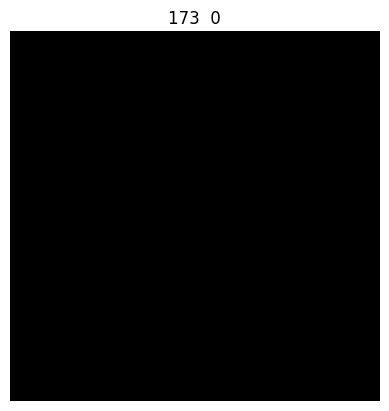

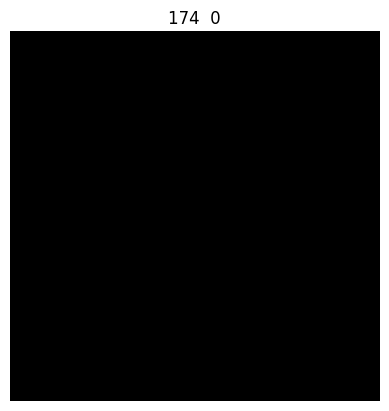

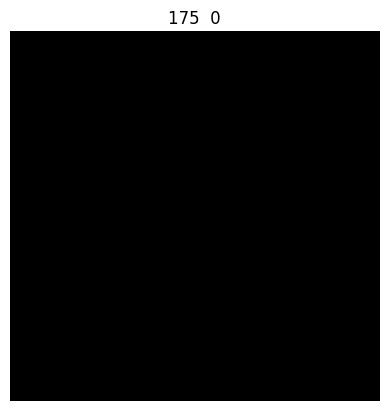

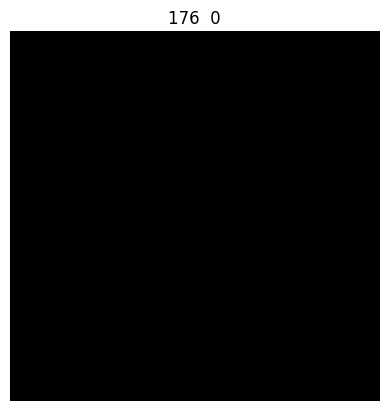

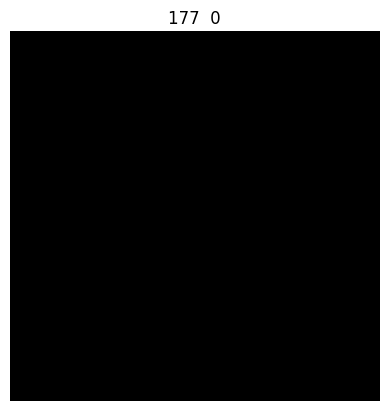

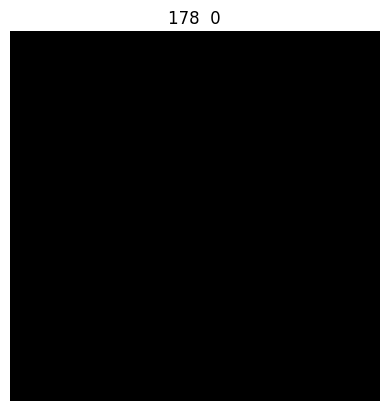

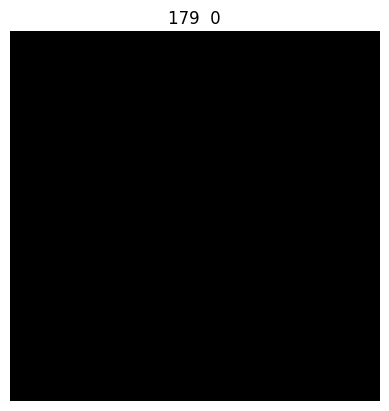

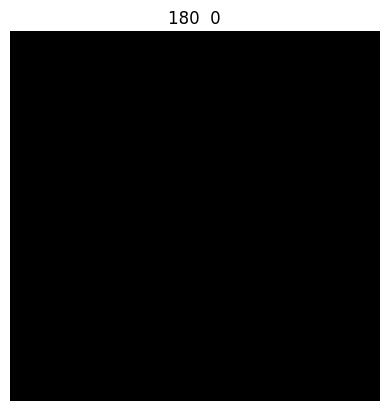

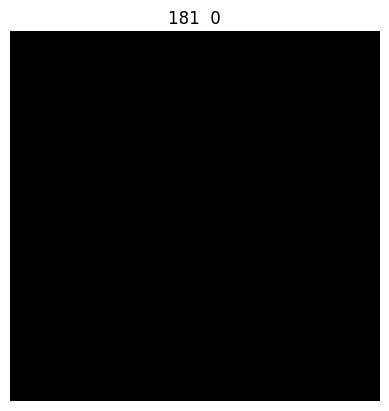

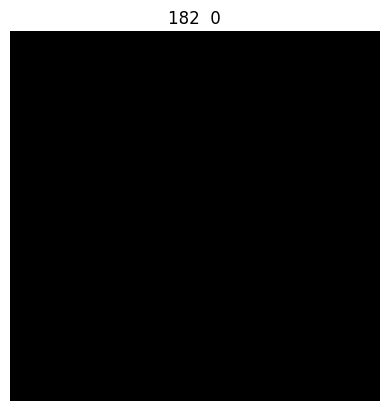

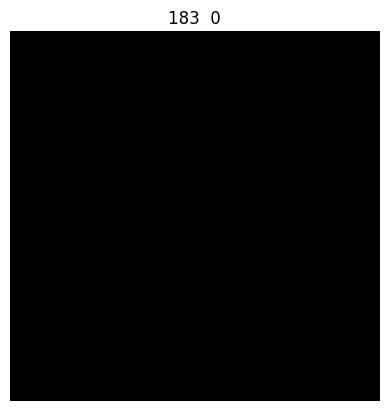

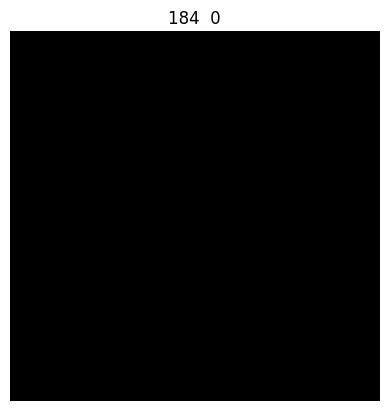

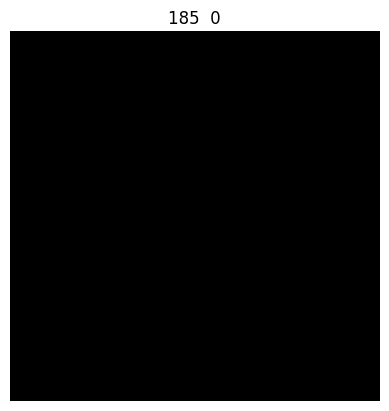

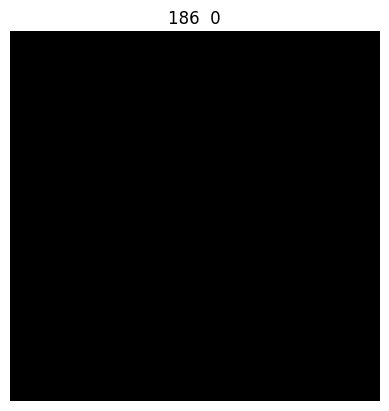

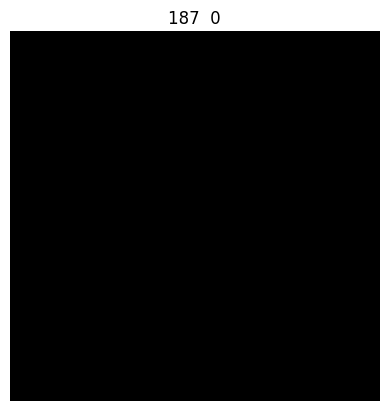

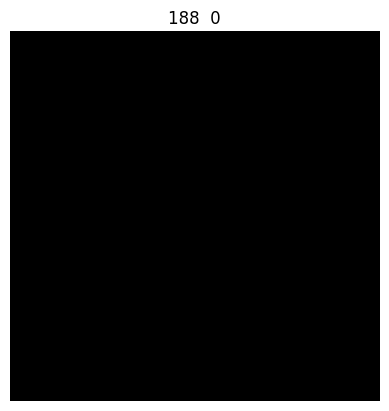

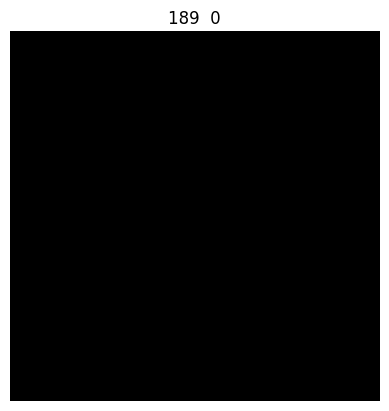

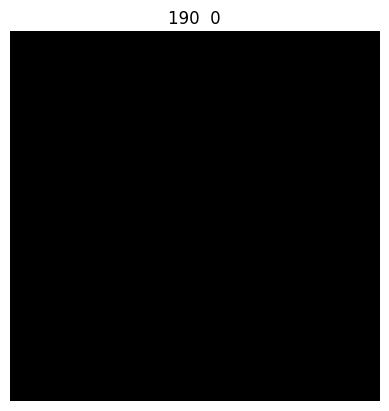

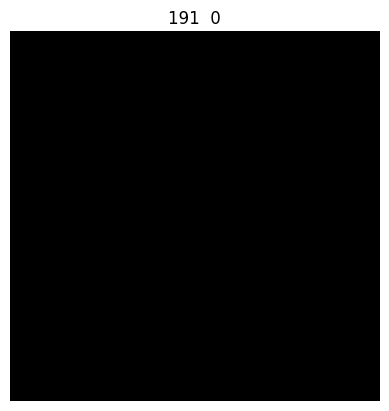

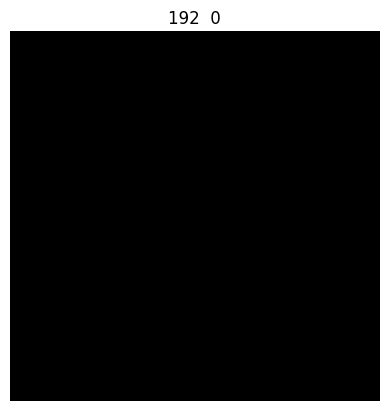

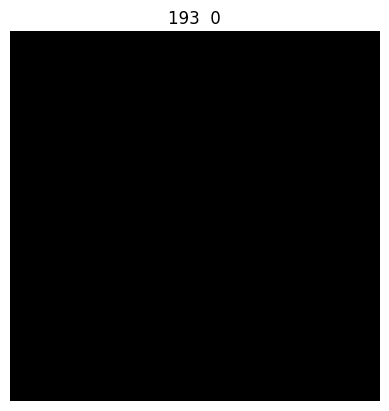

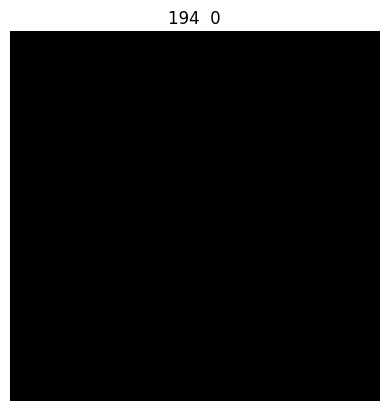

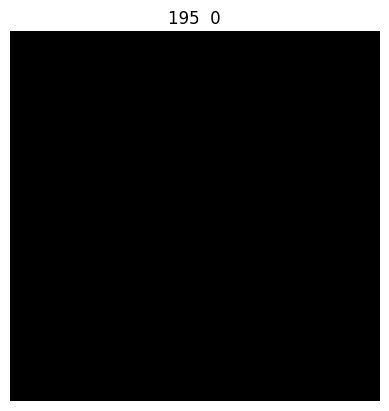

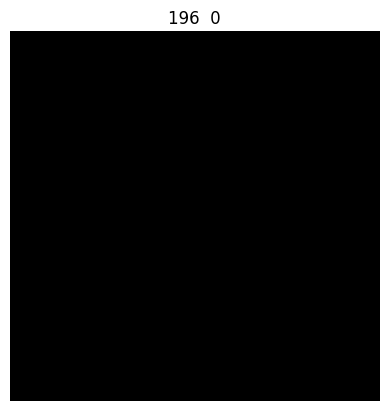

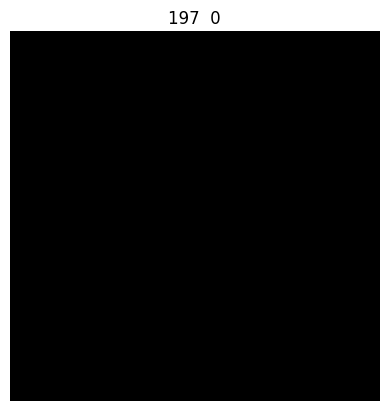

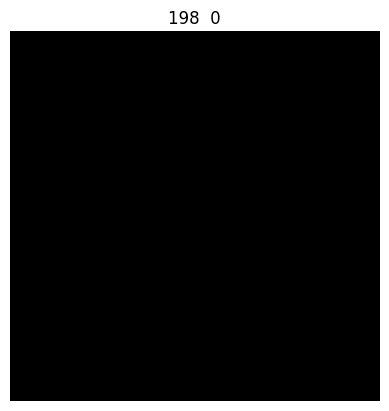

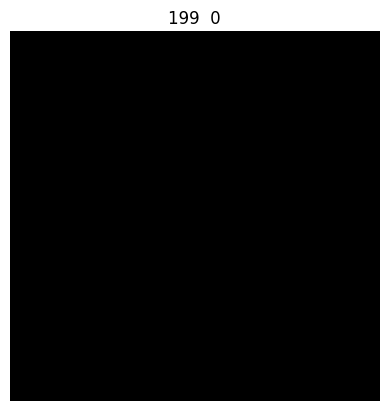

In [ ]:
# ## removing the slices with no image inside it
# for indx in range(new_stacked_img.shape[0]):
#     plt.imshow(new_stacked_img[indx],cmap='grey')
#     plt.title(f"{indx}  {round(np.mean(new_stacked_img[indx]))}")
#     plt.axis("off")
#     plt.show()

In [37]:
len(resized_image)

167

In [38]:
## removing the slices with no image inside it
filtered_array = []
for indx in range(resized_image.shape[0]):
    if np.mean(resized_image[indx]) >= 10.0:
        filtered_array.append(resized_image[indx])

In [39]:
filtered_array = np.array(filtered_array)

In [40]:
# ## removing the slices with no image inside it
# for indx in range(filtered_array.shape[0]):
#     plt.imshow(filtered_array[indx],cmap='grey')
#     plt.title(f"{indx}  {round(np.mean(filtered_array[indx]))}")
#     plt.axis("off")
#     plt.show()

## **Bringing all preprocessing to the final function**

In [81]:
def preprocess(folder_having_dcm):
    if folder_having_dcm is None:
        raise ValueError("Path to the folder havinf .dcm images cannot be None")
    paths = f'{folder_having_dcm}/*.dcm'
    dcm_imgs = [pydicom.dcmread(sli) for sli in glob(paths)]
    print(len(dcm_imgs))
    if len(dcm_imgs)==0:
        raise ValueError("Please provide valid path to the images in the .dcm format")
    
    ## Sorting the Images according to the Z-axis
    dcm_imgs.sort(key= lambda X: X.ImagePositionPatient[2])
    ## stacking the images
    stacked_img = np.stack([im.pixel_array for im in dcm_imgs])
    print("Shape of the stacked Image:\t",stacked_img.shape)
    # ## HU ajusted image
    # new_stacked_img = get_HU(dcm_imgs,stacked_img)
    ## get the pixel adjusted image
    pixel_adjusted_img = adjust_pixel_space(dcm_imgs,stacked_img)
    print("shape of pixel Adjusted image:\t",pixel_adjusted_img.shape)
    # Resize to (512,512)
    resized_image = resize_slices(pixel_adjusted_img)
    ## removing the slices with no image inside it
    filtered_array = []
    for indx in range(resized_image.shape[0]):
        if np.mean(resized_image[indx]) >= 10.0:
            filtered_array.append(resized_image[indx])
    filtered_array = np.array(filtered_array)
    # return resized_image
    return filtered_array


In [75]:
img = preprocess('/mnt/nvme_disk2/User_data/nc36192d/rushi/Learnings/kaggle_datasets/rsna_dataset/test/00001/FLAIR')
img.shape

208
Shape of the stacked Image:	 (208, 512, 512)


/tmp/ipykernel_2948398/891089229.py:14: DeprecationWarning: Please import `zoom` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  image = scipy.ndimage.interpolation.zoom(image, new_spacing, mode='nearest')


shape of pixel Adjusted image:	 (173, 1024, 1024)


(126, 512, 512)

In [79]:
img = preprocess('/mnt/nvme_disk2/User_data/nc36192d/rushi/Learnings/kaggle_datasets/rsna_dataset/train/00008/T1w')
img.shape

30
Shape of the stacked Image:	 (30, 512, 512)


/tmp/ipykernel_2948398/891089229.py:14: DeprecationWarning: Please import `zoom` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  image = scipy.ndimage.interpolation.zoom(image, new_spacing, mode='nearest')


shape of pixel Adjusted image:	 (6, 1140, 1140)


(6, 512, 512)

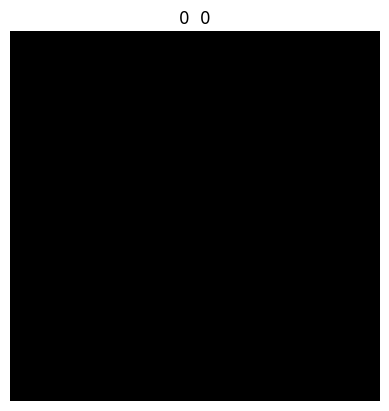

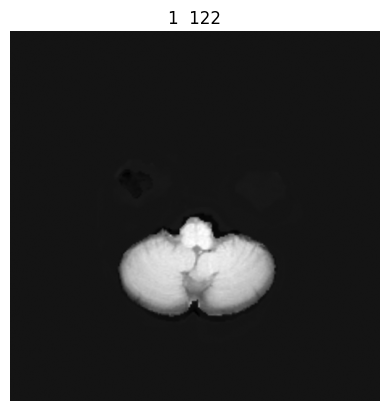

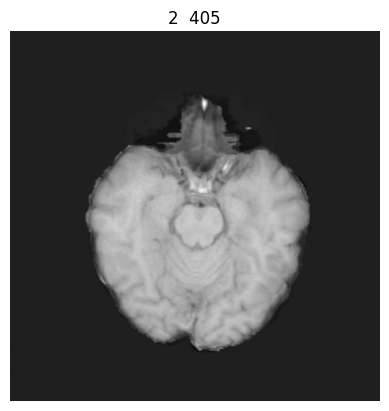

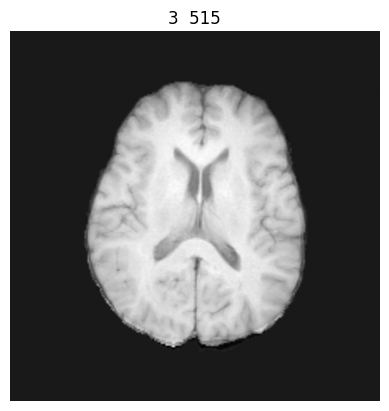

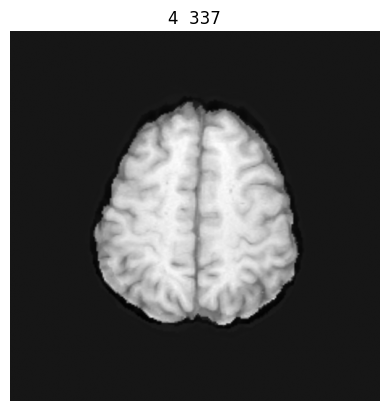

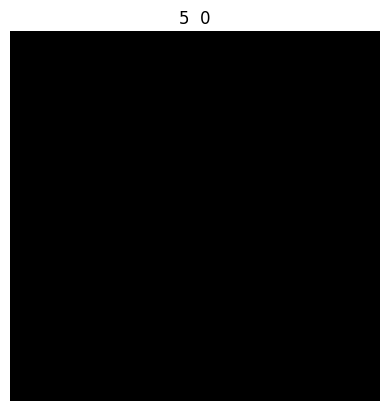

In [80]:
## removing the slices with no image inside it
for indx in range(img.shape[0]):
    plt.imshow(img[indx],cmap='grey')
    plt.title(f"{indx}  {round(np.mean(img[indx]))}")
    plt.axis("off")
    plt.show()

In [57]:
a =[]
a==None

False

In [58]:
def read_file(filepath):
    if filepath is None:
        raise ValueError("File path cannot be None")

    try:
        with open(filepath, "r", encoding="utf-8") as file:
            return file.read()
    except FileNotFoundError:
        raise ValueError(f"File not found: {filepath}")

# Example usage
file_content = read_file("example.txt")
print(file_content)


ValueError: File not found: example.txt

In [ ]:
!pwd

/mnt/nvme_disk2/User_data/nc36192d/rushi/Learnings/RSNA-MCCAI


In [ ]:
160/4

40.0